In [1]:
import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt 

#importing seaborn for statistical plots
import seaborn as sns

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split,GridSearchCV 

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# importing zscore for scaling
from scipy.stats import zscore

# importing auc, roc, classification report & confusion matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

Importing the dataset (Output from Project Notes 01)

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("Customer Churn Data.xlsx", sheet_name = "Data for DSBA")

#### Checking Top 5 Observations

In [ ]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


#### Checking Bottom 5 Observations

In [ ]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


#### Checking the Shape of the Dataset

In [ ]:
r, c = df.shape
print('No of Rows in the dataset :', r)
print('No of Columns in the dataset :', c)

No of Rows in the dataset : 11260
No of Columns in the dataset : 19


From the above we can see that there are **11,260 Observations** and **19 variables** in the given dataset

#### Checking the info of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

From the above we can see that below variables which should be in continuous type but is in object/categorical type it might be because few observations would have entered with special characteristics like @, $, * etc. This can be checked with unique values feature

1. Tenure
2. Account User Count
3. Revenue Per Month
4. Revenue Growth YOY
5. Coupon Used for Payment
6. Day Since CC Connect
7. Cashback

#### Checking Unique Values for Categorical Values

In [ ]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print(feature)
        print(df[feature].unique())
        print('\n')

Tenure
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]


Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender
['Female' 'Male' 'F' nan 'M']


Account_user_count
[3 4 nan 5 2 '@' 1 6]


account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']


Marital_Status
['Single' 'Divorced' 'Married' nan]


rev_per_month
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 105 20 119 121 137 110 22 101
 136 125 14 13 12 115 23 122 117 131 104 15 25 135 111 109 100 103]


rev_growth_yoy
[11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26 '$' 4 27 28]


coupon_used_for_payment
[1 0 4 2 9 6 11 7 12 10 5 3 13 15 8 '#' '$' 14 '*' 16]


Day_Since_CC_connect
[5 0 3 7 2 1 8 6 4 15 nan 11 10 9 13 12 17 16 14 30 '$' 46 18 31 47]


cashback
[159.93 120.9 nan ... 227.36 226.91 191.42]


Login_device
['Mobile' 'Compu

In [ ]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print(feature)
        print(df[feature].value_counts(dropna = True))
        print('\n')

Tenure
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
4      403
5      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
30     137
28     137
27     131
99     131
26     122
#      116
29     114
25     114
31      96
50       2
51       2
60       2
61       2
Name: Tenure, dtype: int64


Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64


Account_user_count
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64


account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +        

#### Removing unwanted Attributes (Where there are special characters like '@', '#' in the variables)

In [ ]:
feature = df.select_dtypes(include=['object']).columns
for i in range(0,len(feature)):
  df[feature[i]]= df[feature[i]].replace({'@':np.nan,'#':np.nan,'+':np.nan,'$':np.nan,'*':np.nan,'&&&&':np.nan})

#### Renaming Attributes

In [ ]:
df['Gender']= df['Gender'].replace({'M':'Male', 'F':'Female'})
df['account_segment'] = df['account_segment'].replace({'Regular +':'Regular Plus', 'Super +':'Super Plus'})

#### Checking the Info of the Dataset (After renaming & removing attributes)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

From above we can see that the total categorical variables present in the dataset is 5. Other 7 which was as of object has been changed to float once the attributes were removed/renamed

#### Checking the Unique Values/Value Counts for Categorical Variables

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts(dropna = False).sort_values())
        print('\n')

PAYMENT :  5
NaN                  109
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  2
NaN        108
Female    4448
Male      6704
Name: Gender, dtype: int64


ACCOUNT_SEGMENT :  5
NaN               97
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4124
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
NaN          212
Divorced    1668
Single      3520
Married     5860
Name: Marital_Status, dtype: int64


LOGIN_DEVICE :  2
NaN          760
Computer    3018
Mobile      7482
Name: Login_device, dtype: int64




#### Checking Missing Values in the Dataset

In [ ]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)  
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])  
    return missing_data
missing_check(df)

,Total,Percent
rev_per_month,791,7.024867
Login_device,760,6.749556
cashback,473,4.200710
Account_user_count,444,3.943162
Day_Since_CC_connect,358,3.179396
Complain_ly,357,3.170515
Tenure,218,1.936057
Marital_Status,212,1.882771
CC_Agent_Score,116,1.030195
City_Tier,112,0.994671


#### Removing Account ID variable 

In [ ]:
df = df.drop('AccountID', axis = 1) # Account ID is not much of important feature for Exploratory Data Analysis

#### Checking for any Duplicate Values

In [ ]:
dups = df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 264


#### Droping the duplicate rows

In [ ]:
df.drop_duplicates(inplace=True) 

In [ ]:
dups = df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


#### Checking the Summary of the Dataset (Continuous Variables)

In [ ]:
df.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,10996.000000,10778.000000,10884.000000,10894.000000,10898.000000,10552.000000,10880.000000,10205.000000,10639.000000,10993.000000,10993.00000,10638.000000,10523.000000
mean,0.168334,11.068844,1.654539,17.893152,2.900807,3.692570,3.057629,6.410975,0.285741,16.207223,1.80151,4.648806,196.936018
std,0.374180,12.975930,0.915881,8.871201,0.726141,1.023406,1.380296,12.050830,0.451788,3.760356,1.97733,3.700704,180.696905
min,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.00000,2.000000,147.355000
50%,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.00000,3.000000,165.620000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.00000,8.000000,200.855000
max,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.00000,47.000000,1997.000000


#### Checking the Summary of the Dataset (Categorical Variables)

In [ ]:
cat = ['Payment','Gender','account_segment','Marital_Status','Login_device']

In [ ]:
df[cat].describe().T

,count,unique,top,freq
Payment,10887,5,Debit Card,4482
Gender,10888,2,Male,6545
account_segment,10899,5,Regular Plus,4012
Marital_Status,10785,3,Married,5708
Login_device,10236,2,Mobile,7306


### 3. Exploratory Data Analysis

### a. Univariate Analysis for Continuous Variables

#### (i) Univariate Analysis for Continuous Variables (Tenure, CC_Contacted_LY, rev_per_month)

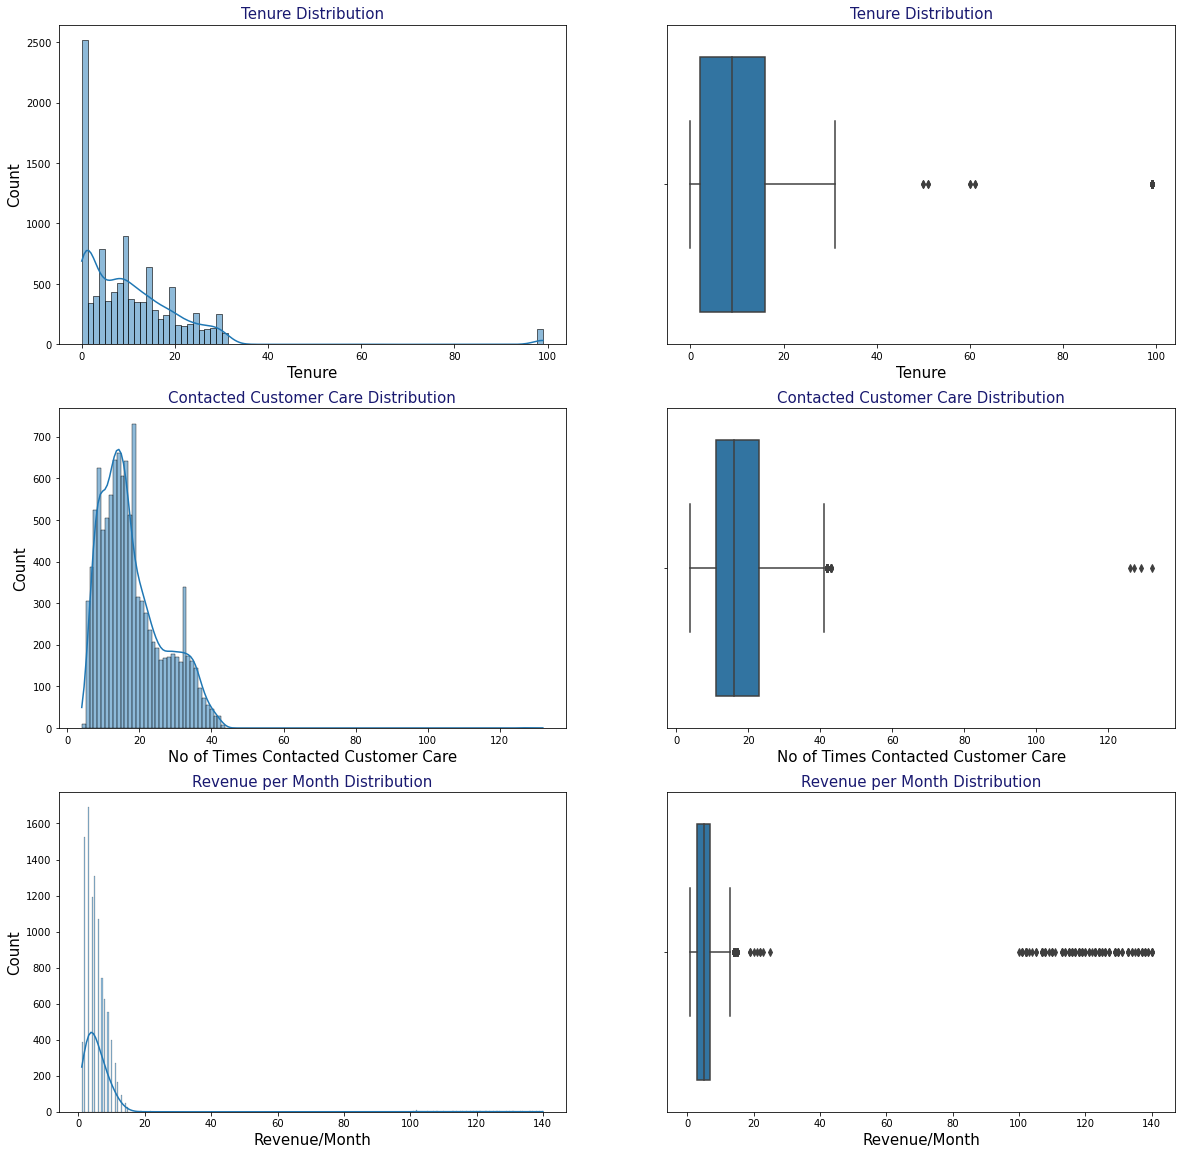

In [ ]:
fig, axes = plt.subplots(nrows = 3 ,ncols = 2)
fig.set_size_inches(20,20)


# Tenure Variabe
a = sns.histplot(df['Tenure'],kde=True, ax=axes[0][0])
a.set_title("Tenure Distribution",fontsize=15,color='#191970')
a.set_xlabel('Tenure',fontsize=15)
a.set_ylabel('Count',fontsize=15)
a = sns.boxplot(df['Tenure'] , ax=axes[0][1])
a.set_title("Tenure Distribution",fontsize=15,color='#191970')
a.set_xlabel('Tenure',fontsize=15)

# CC_Contacted_LY Variable 
a = sns.histplot(df['CC_Contacted_LY'],kde=True , ax=axes[1][0])
a.set_title("Contacted Customer Care Distribution",fontsize=15,color='#191970')
a.set_xlabel('No of Times Contacted Customer Care',fontsize=15)
a.set_ylabel('Count',fontsize=15)
a = sns.boxplot(df['CC_Contacted_LY'] , ax=axes[1][1])
a.set_title("Contacted Customer Care Distribution",fontsize=15,color='#191970')
a.set_xlabel('No of Times Contacted Customer Care',fontsize=15)

# rev_per_month Variable
a = sns.histplot(df['rev_per_month'],kde=True, ax=axes[2][0])
a.set_title("Revenue per Month Distribution",fontsize=15,color='#191970')
a.set_xlabel('Revenue/Month',fontsize=15)
a.set_ylabel('Count',fontsize=15)
a = sns.boxplot(df['rev_per_month'] , ax=axes[2][1])
a.set_title("Revenue per Month Distribution",fontsize=15,color='#191970')
a.set_xlabel('Revenue/Month',fontsize=15)

plt.show()

#### (ii) Univariate Analysis for Continuous Variables (rev_growth_yoy, coupon_used_for_payment, Day_Since_CC_connect)

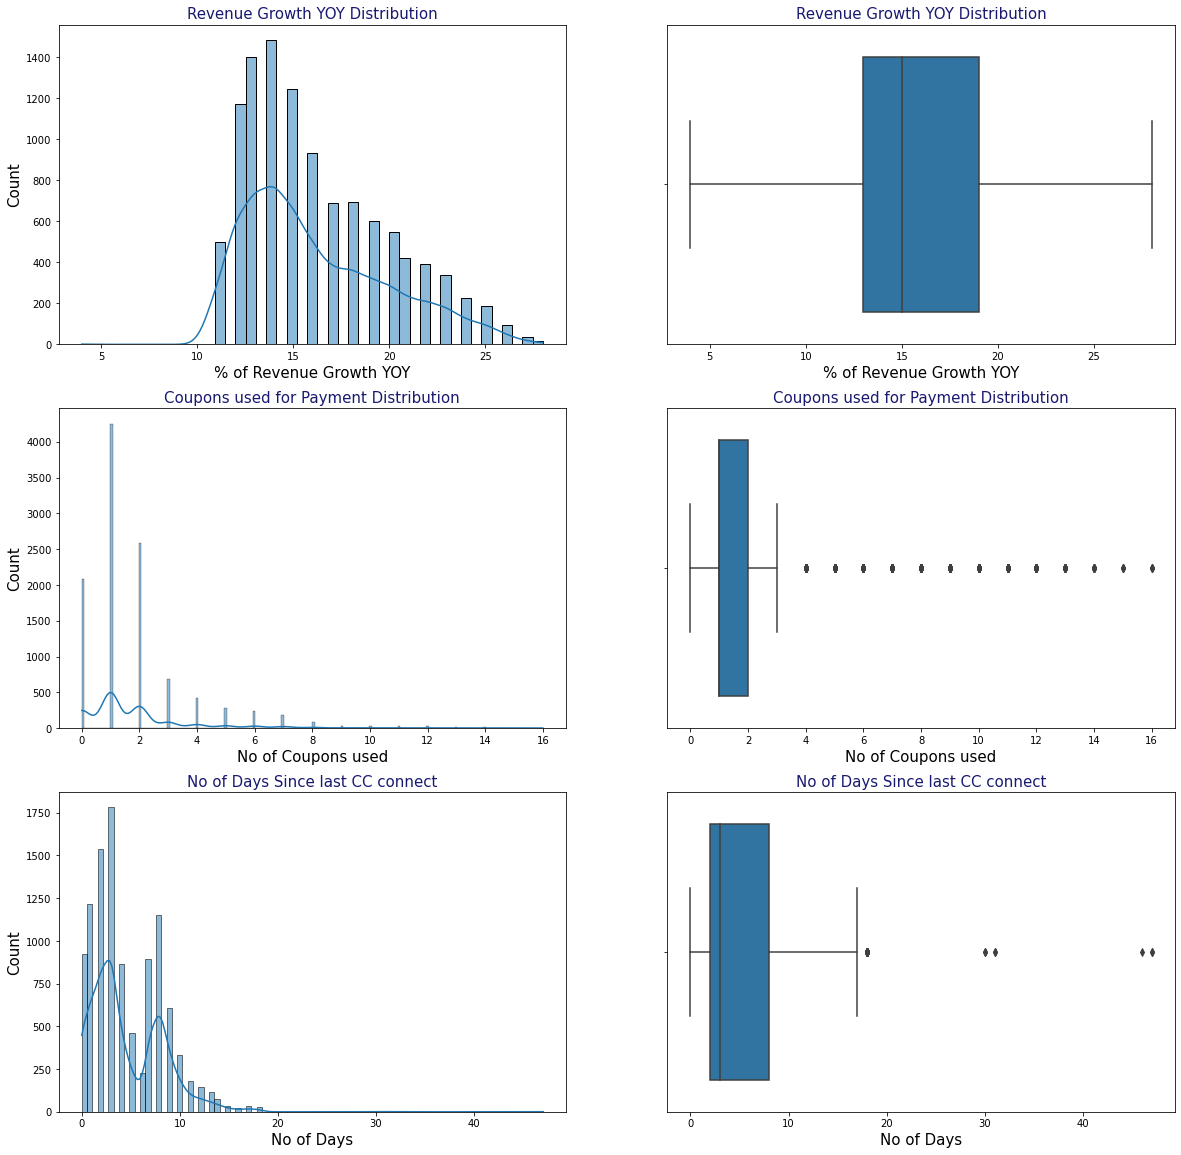

In [ ]:
fig, axes = plt.subplots(nrows = 3 ,ncols = 2)
fig.set_size_inches(20,20)

# rev_growth_yoy
a = sns.histplot(df['rev_growth_yoy'] ,kde=True, ax=axes[0][0])
a.set_title("Revenue Growth YOY Distribution",fontsize=15,color='#191970')
a.set_xlabel('% of Revenue Growth YOY',fontsize=15)
a.set_ylabel('Count',fontsize=15)
a = sns.boxplot(df['rev_growth_yoy'] , ax=axes[0][1])
a.set_title("Revenue Growth YOY Distribution",fontsize=15,color='#191970')
a.set_xlabel('% of Revenue Growth YOY',fontsize=15)

# coupon_used_for_payment
a = sns.histplot(df['coupon_used_for_payment'],kde=True , ax=axes[1][0])
a.set_title("Coupons used for Payment Distribution",fontsize=15,color='#191970')
a.set_xlabel('No of Coupons used',fontsize=15)
a.set_ylabel('Count',fontsize=15)
a = sns.boxplot(df['coupon_used_for_payment'] , ax=axes[1][1])
a.set_title("Coupons used for Payment Distribution",fontsize=15,color='#191970')
a.set_xlabel('No of Coupons used',fontsize=15)
             
# Day_Since_CC_connect
a = sns.histplot(df['Day_Since_CC_connect'],kde=True , ax=axes[2][0])
a.set_title("No of Days Since last CC connect",fontsize=15,color='#191970')
a.set_xlabel('No of Days',fontsize=15)
a.set_ylabel('Count',fontsize=15)
a = sns.boxplot(df['Day_Since_CC_connect'] , ax=axes[2][1])
a.set_title("No of Days Since last CC connect",fontsize=15,color='#191970')
a.set_xlabel('No of Days',fontsize=15)
             
plt.show()

#### (iii) Univariate Analysis for Continuous Variables (cashback)

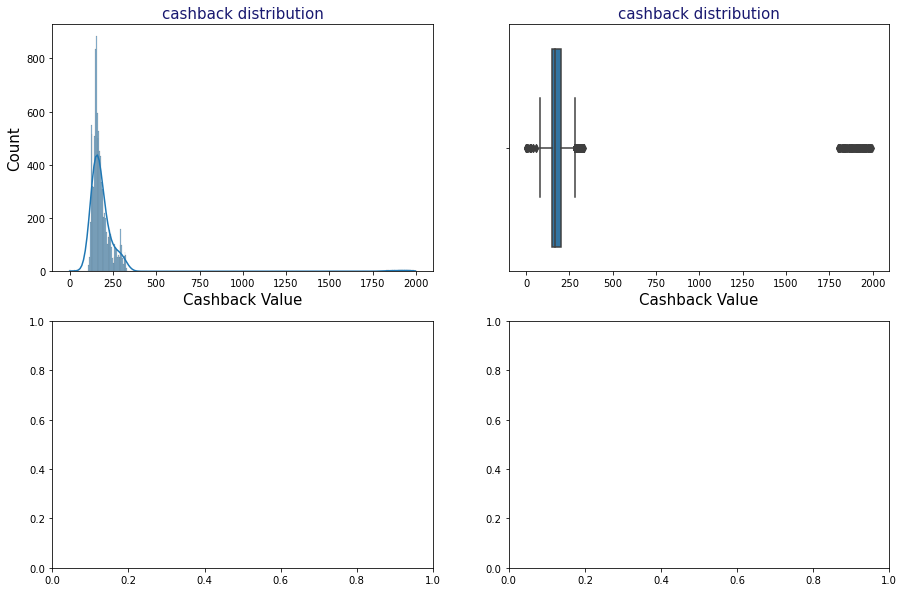

In [ ]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(15,10)

# Cashback
a = sns.histplot(df['cashback'],kde=True,ax=axes[0][0])
a.set_title("cashback distribution",fontsize=15,color='#191970')
a.set_xlabel('Cashback Value',fontsize=15)
a.set_ylabel('Count',fontsize=15)

a = sns.boxplot(df['cashback'] , ax=axes[0][1])
a.set_title("cashback distribution",fontsize=15,color='#191970')
a.set_xlabel('Cashback Value',fontsize=15)

plt.show()

### a. Univariate Analysis for Categorical Variables

#### 1. Customer Churn - Pie Plot

In [ ]:
count = df['Churn'].value_counts().sort_values()
labels = df['Churn'].unique()

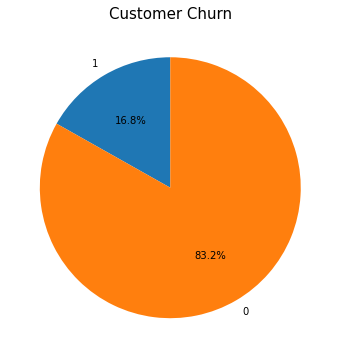

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(count,labels = labels, startangle=90, autopct='%.1f%%')
plt.title('Customer Churn',fontsize = 15)
plt.show()

From the above pie-chart we can say the following

1. 83.2% of customers are churning 
2. 16.8% of customers are not churning

#### 2. City Tier

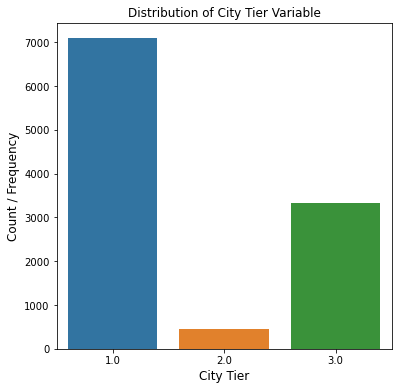

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'City_Tier', data = df)
plt.ylabel('Count / Frequency',fontsize = 12)
plt.xlabel('City Tier',fontsize = 12)
plt.title('Distribution of City Tier Variable',fontsize = 12)
plt.show()

#### 3. Prefered Payment Mode

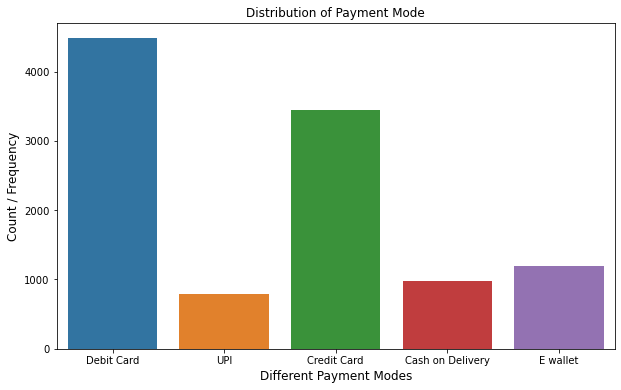

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Payment', data = df)
plt.ylabel('Count / Frequency',fontsize = 12)
plt.xlabel('Different Payment Modes',fontsize = 12)
plt.title('Distribution of Payment Mode',fontsize = 12)
plt.show()

#### 4. Gender

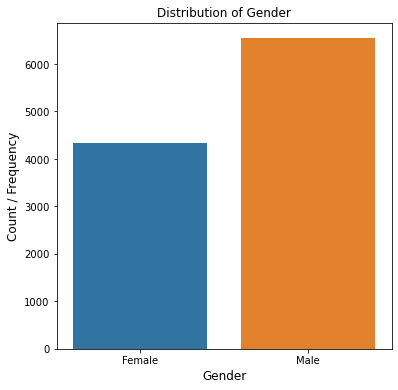

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Gender', data = df)
plt.ylabel('Count / Frequency',fontsize = 12)
plt.xlabel('Gender',fontsize = 12)
plt.title('Distribution of Gender',fontsize = 12)
plt.show()

#### 5. Service Score

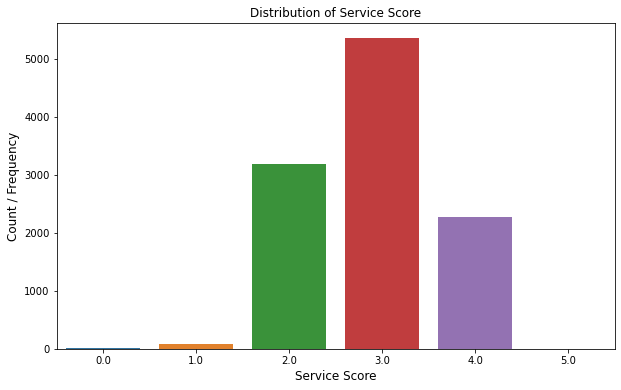

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Service_Score', data = df)
plt.ylabel('Count / Frequency',fontsize = 12)
plt.xlabel('Service Score',fontsize = 12)
plt.title('Distribution of Service Score',fontsize = 12)
plt.show()

#### 6. Account User Count

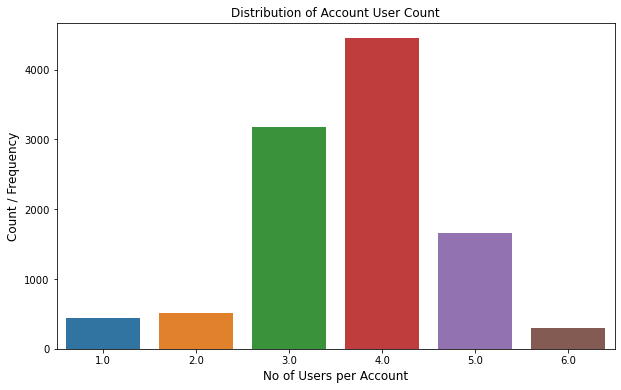

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Account_user_count', data = df)
plt.ylabel('Count / Frequency',fontsize = 12)
plt.xlabel('No of Users per Account',fontsize = 12)
plt.title('Distribution of Account User Count',fontsize = 12)
plt.show()

#### 7. Account Segment

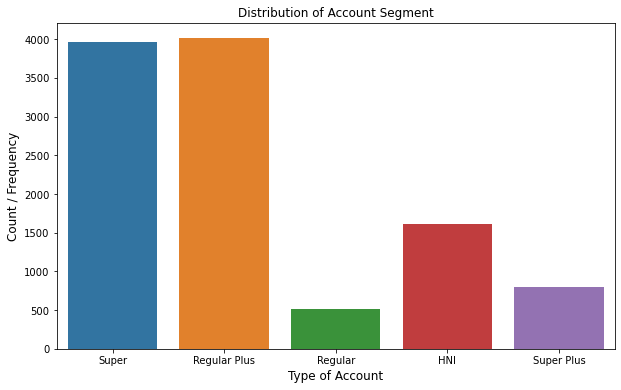

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'account_segment', data = df)
plt.ylabel('Count / Frequency',fontsize = 12)
plt.xlabel('Type of Account',fontsize = 12)
plt.title('Distribution of Account Segment',fontsize = 12)
plt.show()

#### 8. Customer Care Agent Score

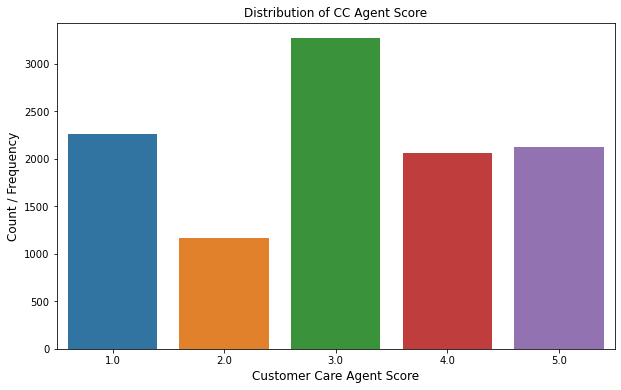

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'CC_Agent_Score', data = df)
plt.ylabel('Count / Frequency',fontsize = 12)
plt.xlabel('Customer Care Agent Score',fontsize = 12)
plt.title('Distribution of CC Agent Score',fontsize = 12)
plt.show()

#### 9. Martial Status

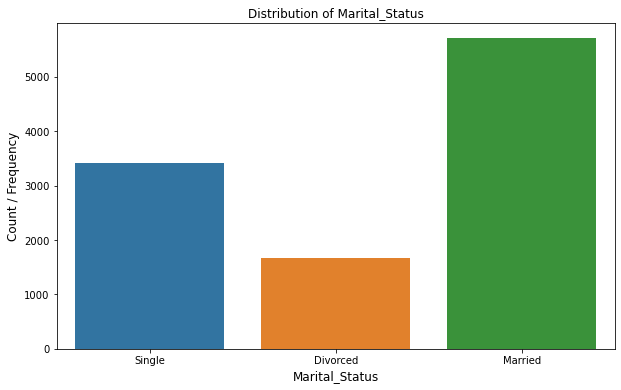

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Marital_Status', data = df)
plt.ylabel('Count / Frequency',fontsize = 12)
plt.xlabel('Marital_Status',fontsize = 12)
plt.title('Distribution of Marital_Status',fontsize = 12)
plt.show()

#### 10. Login Device

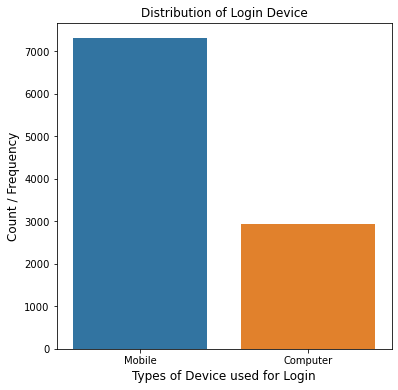

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Login_device', data = df)
plt.ylabel('Count / Frequency',fontsize = 12)
plt.xlabel('Types of Device used for Login',fontsize = 12)
plt.title('Distribution of Login Device',fontsize = 12)
plt.show()

#### 11. Complain Last 12 Months

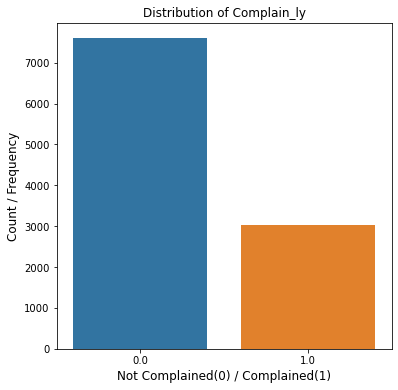

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Complain_ly', data = df)
plt.ylabel('Count / Frequency',fontsize = 12)
plt.xlabel('Not Complained(0) / Complained(1)',fontsize = 12)
plt.title('Distribution of Complain_ly',fontsize = 12)
plt.show()

### b. Bivariate Analysis (Categorical / Non-Continuous Variables)

#### 1. Churn V/s Payment

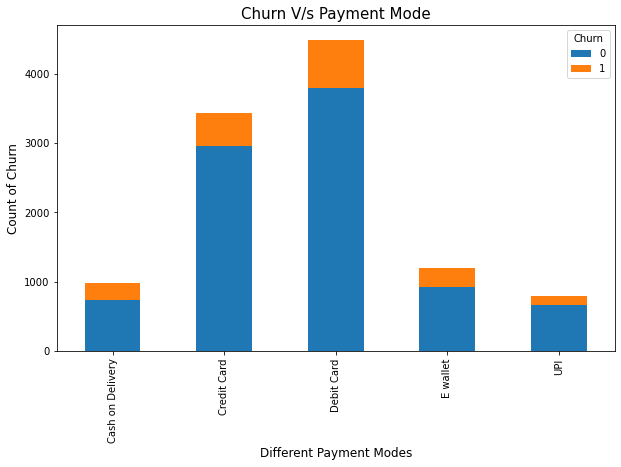

In [ ]:
df.groupby('Payment')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(10,6))
plt.ylabel('Count of Churn',fontsize = 12)
plt.xlabel('Different Payment Modes',fontsize = 12)
plt.title('Churn V/s Payment Mode',fontsize = 15)
plt.show()

#### 2. Gender V/s Churn

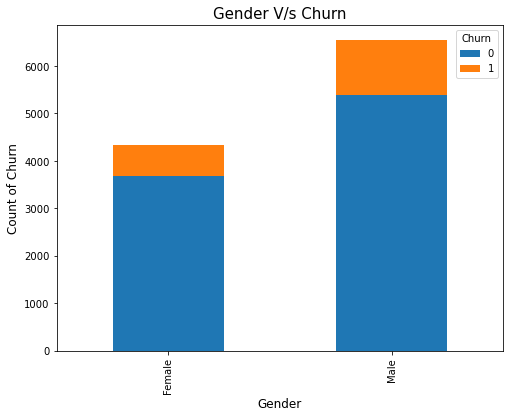

In [ ]:
df.groupby('Gender')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(8,6))
plt.ylabel('Count of Churn',fontsize = 12)
plt.xlabel('Gender',fontsize = 12)
plt.title('Gender V/s Churn',fontsize = 15)
plt.show()

#### 3. Account Segment V/s Churn

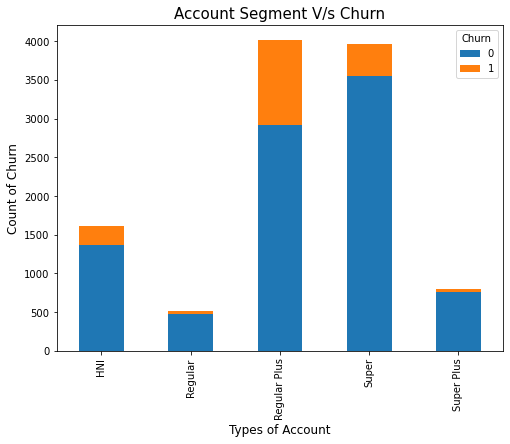

In [ ]:
df.groupby('account_segment')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(8,6))
plt.ylabel('Count of Churn',fontsize = 12)
plt.xlabel('Types of Account',fontsize = 12)
plt.title('Account Segment V/s Churn',fontsize = 15)
plt.show()

#### 4. Martial Status V/s Churn

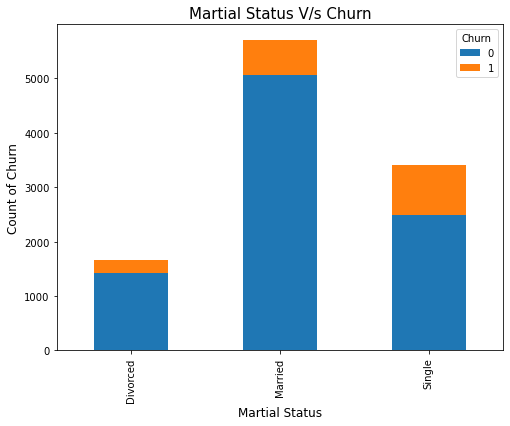

In [ ]:
df.groupby('Marital_Status')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(8,6))
plt.ylabel('Count of Churn',fontsize = 12)
plt.xlabel('Martial Status',fontsize = 12)
plt.title('Martial Status V/s Churn',fontsize = 15)
plt.show()

#### 5. Login Device V/s Churn

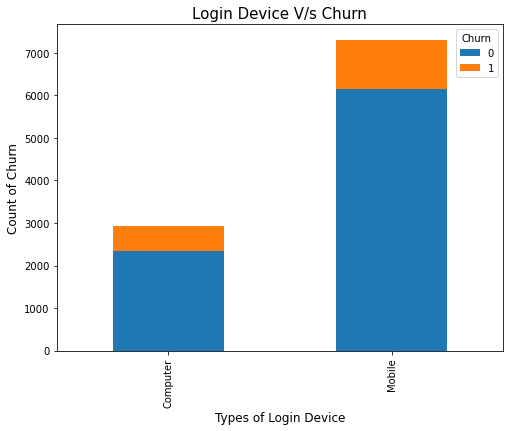

In [ ]:
df.groupby('Login_device')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(8,6))
plt.ylabel('Count of Churn',fontsize = 12)
plt.xlabel('Types of Login Device',fontsize = 12)
plt.title('Login Device V/s Churn',fontsize = 15)
plt.show()

#### 6. City Tier V/s Churn

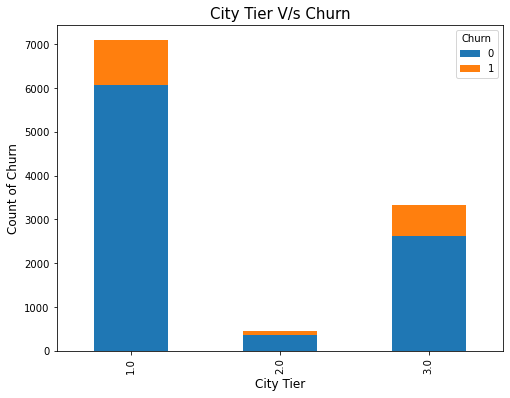

In [ ]:
df.groupby('City_Tier')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(8,6))
plt.ylabel('Count of Churn',fontsize = 12)
plt.xlabel('City Tier',fontsize = 12)
plt.title('City Tier V/s Churn',fontsize = 15)
plt.show()

#### 7. Service Score V/s Churn

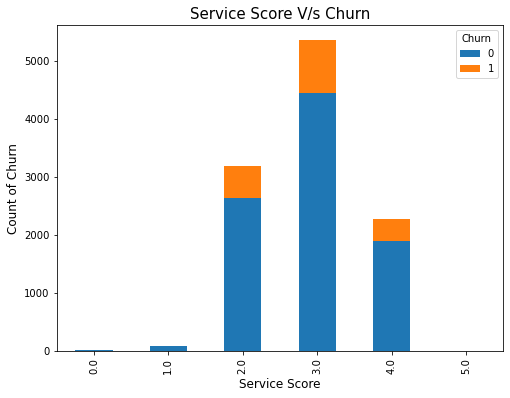

In [ ]:
df.groupby('Service_Score')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(8,6))
plt.ylabel('Count of Churn',fontsize = 12)
plt.xlabel('Service Score',fontsize = 12)
plt.title('Service Score V/s Churn',fontsize = 15)
plt.show()

#### 8. Account User count V/s Churn

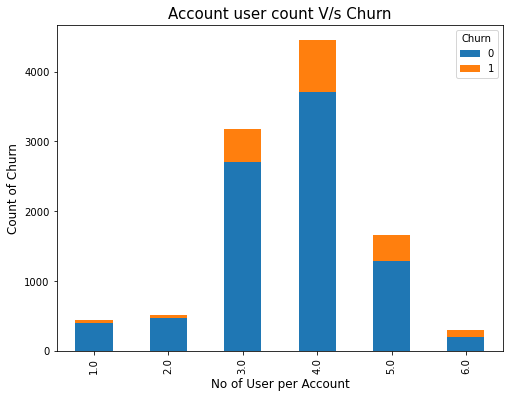

In [ ]:
df.groupby('Account_user_count')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(8,6))
plt.ylabel('Count of Churn',fontsize = 12)
plt.xlabel('No of User per Account',fontsize = 12)
plt.title('Account user count V/s Churn',fontsize = 15)
plt.show()

#### 9. CC Agent Score V/s Churn

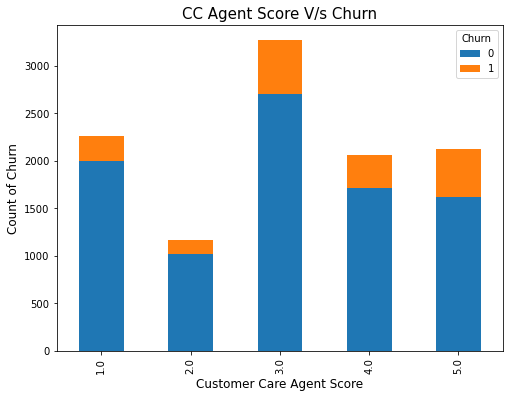

In [ ]:
df.groupby('CC_Agent_Score')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(8,6))
plt.ylabel('Count of Churn',fontsize = 12)
plt.xlabel('Customer Care Agent Score',fontsize = 12)
plt.title('CC Agent Score V/s Churn',fontsize = 15)
plt.show()

#### 10. Complain V/s Churn

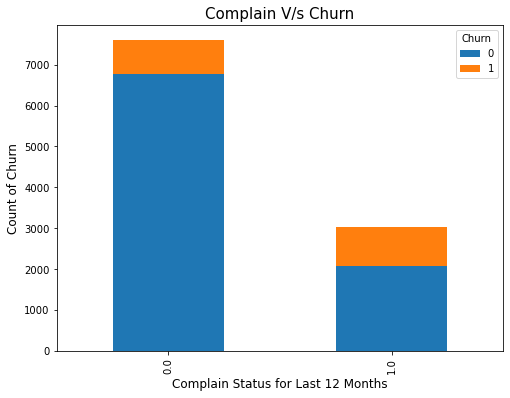

In [ ]:
df.groupby('Complain_ly')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(8,6))
plt.ylabel('Count of Churn',fontsize = 12)
plt.xlabel('Complain Status for Last 12 Months',fontsize = 12)
plt.title('Complain V/s Churn',fontsize = 15)
plt.show()

### b. Bivariate Analysis (Continuous Variables)

#### 1. Tenure V/s Churn

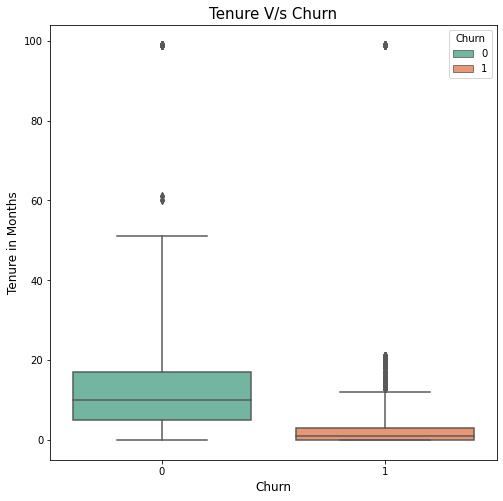

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Churn', y= 'Tenure', data = df, hue = 'Churn', palette="Set2", dodge = False,whis=3.0)
plt.ylabel('Tenure in Months',fontsize = 12)
plt.xlabel('Churn',fontsize = 12)
plt.title('Tenure V/s Churn',fontsize = 15)
plt.show()

#### 2. CC_Contacted_LY V/s Churn

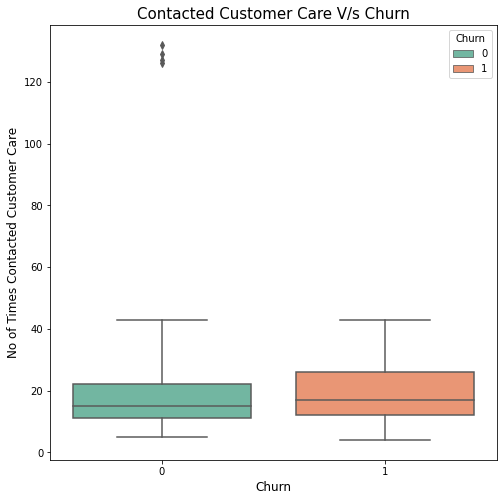

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Churn', y= 'CC_Contacted_LY', data = df, hue = 'Churn', palette="Set2", dodge = False,whis=3.0)
plt.ylabel('No of Times Contacted Customer Care',fontsize = 12)
plt.xlabel('Churn',fontsize = 12)
plt.title('Contacted Customer Care V/s Churn',fontsize = 15)
plt.show()

#### 3. Revenue Per Month V/s Churn

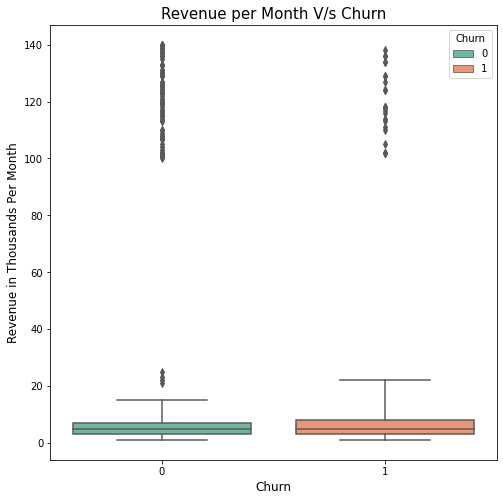

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Churn', y= 'rev_per_month', data = df, hue = 'Churn', palette="Set2", dodge = False, whis = 3.0)
plt.ylabel('Revenue in Thousands Per Month',fontsize = 12)
plt.xlabel('Churn',fontsize = 12)
plt.title('Revenue per Month V/s Churn',fontsize = 15)
plt.show()

#### 4. Percentage of Revenue Growth V/s Churn

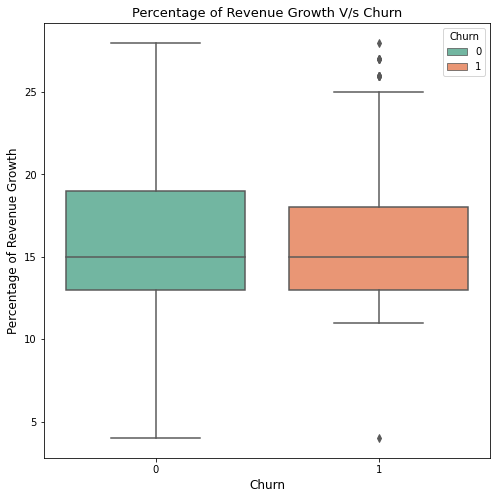

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Churn', y= 'rev_growth_yoy', data = df, hue = 'Churn', palette="Set2", dodge = False, whis = 1.5)
plt.ylabel('Percentage of Revenue Growth',fontsize = 12)
plt.xlabel('Churn',fontsize = 12)
plt.title('Percentage of Revenue Growth V/s Churn',fontsize = 13)
plt.show()

#### 5. Coupons Used for Payment V/s Churn

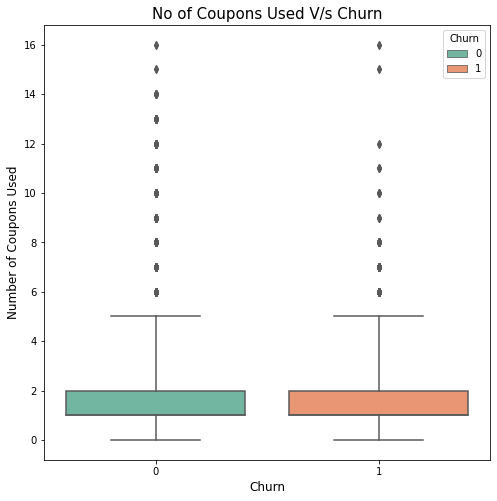

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Churn', y= 'coupon_used_for_payment', data = df, hue = 'Churn', palette="Set2", dodge = False, whis = 3.0)
plt.ylabel('Number of Coupons Used',fontsize = 12)
plt.xlabel('Churn',fontsize = 12)
plt.title('No of Coupons Used V/s Churn',fontsize = 15)
plt.show()

#### 6. Days Since CC Connect V/s Churn

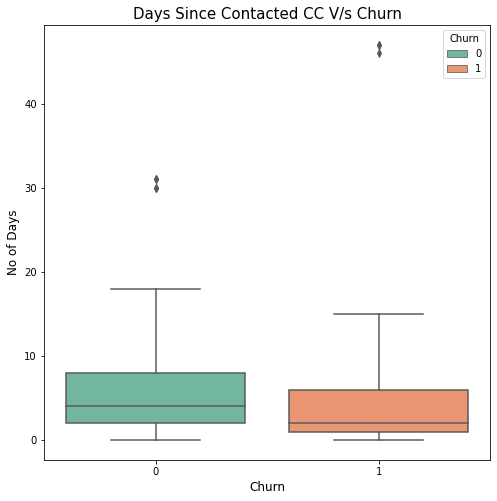

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Churn', y= 'Day_Since_CC_connect', data = df, hue = 'Churn', palette="Set2", dodge = False, whis = 3.0)
plt.ylabel('No of Days',fontsize = 12)
plt.xlabel('Churn',fontsize = 12)
plt.title('Days Since Contacted CC V/s Churn',fontsize = 15)
plt.show()

#### 7. Cashback V/s Churn

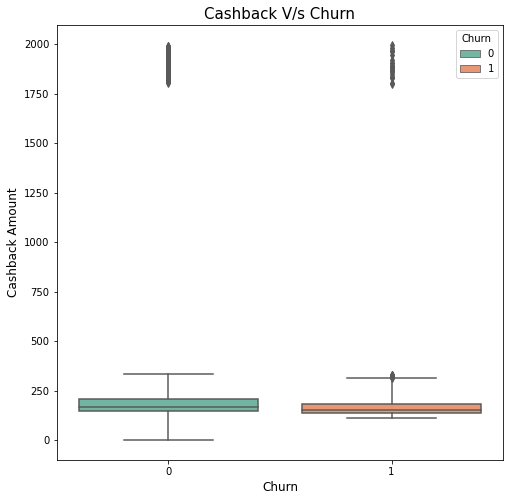

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Churn', y= 'cashback', data = df, hue = 'Churn', palette="Set2", dodge = False, whis = 3.0)
plt.ylabel('Cashback Amount',fontsize = 12)
plt.xlabel('Churn',fontsize = 12)
plt.title('Cashback V/s Churn',fontsize = 15)
plt.show()

#### Correlation Plot (Heat Map)

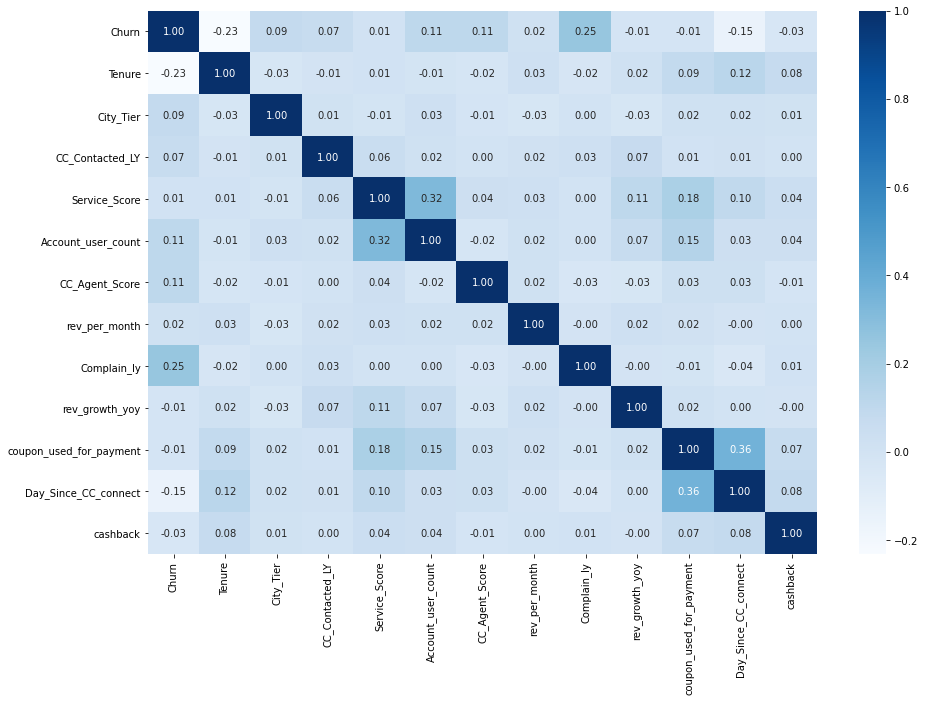

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues',xticklabels='auto', yticklabels='auto')
plt.show()

### c. Checking for Missing Values & Treating

In [ ]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)  
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])  
    return missing_data
missing_check(df)

,Total,Percent
rev_per_month,791,7.193525
Login_device,760,6.911604
cashback,473,4.301564
Account_user_count,444,4.037832
Day_Since_CC_connect,358,3.255729
Complain_ly,357,3.246635
Tenure,218,1.982539
Marital_Status,211,1.918880
CC_Agent_Score,116,1.054929
City_Tier,112,1.018552


#### Treating Missing Values for Categorical Variables

In [ ]:
missing_check(df[cat])

,Total,Percent
Login_device,760,6.911604
Marital_Status,211,1.918880
Payment,109,0.991270
Gender,108,0.982175
account_segment,97,0.882139


Here Since the most the missing value is less than 2% except for Login Device, we will be imputing the missing values with a random category 'Unknown'. Because if we impute these missing values with mode then data will be more skewed towards the majority % which will affect the model. Hence we will be assigning these missing values as unknown

In [ ]:
feature = df.select_dtypes(include=['object']).columns
for i in range(0,len(feature)):
  df[feature[i]]= df[feature[i]].replace({np.nan:'Unknown'})

In [ ]:
missing_check(df[cat])

,Total,Percent
Payment,0,0.0
Gender,0,0.0
account_segment,0,0.0
Marital_Status,0,0.0
Login_device,0,0.0


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts(dropna = False).sort_values())
        print('\n')

PAYMENT :  6
Unknown              109
UPI                  795
Cash on Delivery     976
E wallet            1194
Credit Card         3440
Debit Card          4482
Name: Payment, dtype: int64


GENDER :  3
Unknown     108
Female     4343
Male       6545
Name: Gender, dtype: int64


ACCOUNT_SEGMENT :  6
Unknown           97
Regular          511
Super Plus       803
HNI             1614
Super           3959
Regular Plus    4012
Name: account_segment, dtype: int64


MARITAL_STATUS :  4
Unknown      211
Divorced    1668
Single      3409
Married     5708
Name: Marital_Status, dtype: int64


LOGIN_DEVICE :  3
Unknown      760
Computer    2930
Mobile      7306
Name: Login_device, dtype: int64




#### Treating Missing Values for Continuous Variable

In [ ]:
df.reset_index(inplace=True)

In [ ]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
['index', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


##### Using KNN Imputation for Treating Null Values

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
df_imp = pd.DataFrame(np.round(imputer.fit_transform(df[num]),0),columns = df[num].columns)

In [ ]:
df = pd.concat([df_imp, df[cat]], axis = 1)

In [ ]:
df.drop(columns = 'index', axis = 1, inplace=True)

In [ ]:
missing_check(df)

,Total,Percent
Churn,0,0.0
Tenure,0,0.0
Marital_Status,0,0.0
account_segment,0,0.0
Gender,0,0.0
Payment,0,0.0
cashback,0,0.0
Day_Since_CC_connect,0,0.0
coupon_used_for_payment,0,0.0
rev_growth_yoy,0,0.0


### d. Checking Outliers for Continuous Variables & Treating Outliers if required

In [ ]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Payment', 'Gender', 'account_segment', 'Marital_Status',
       'Login_device'],
      dtype='object')

<AxesSubplot:>

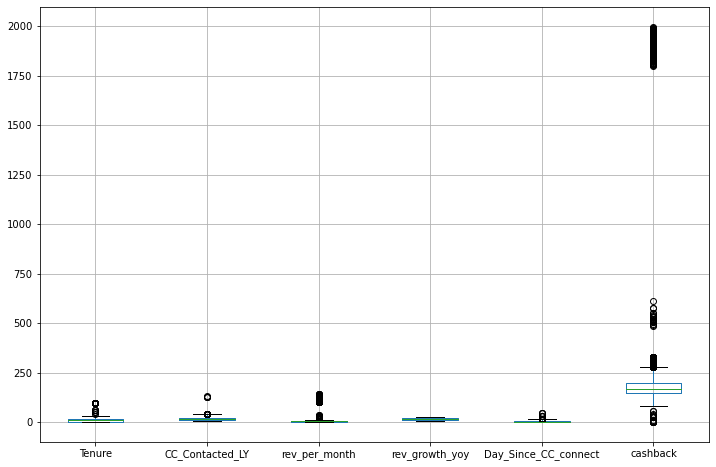

In [ ]:
df[['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','Day_Since_CC_connect','cashback']].boxplot(figsize=(12,8))

In boxplot by default whiskers are capped at **1.5**, hence we will be changing the whisker to **3.0** because values beyond this rarely occur and will be considered as extreme values which do not occur frequently.

##### Checking the Outliers with Whis = 3.0

<AxesSubplot:>

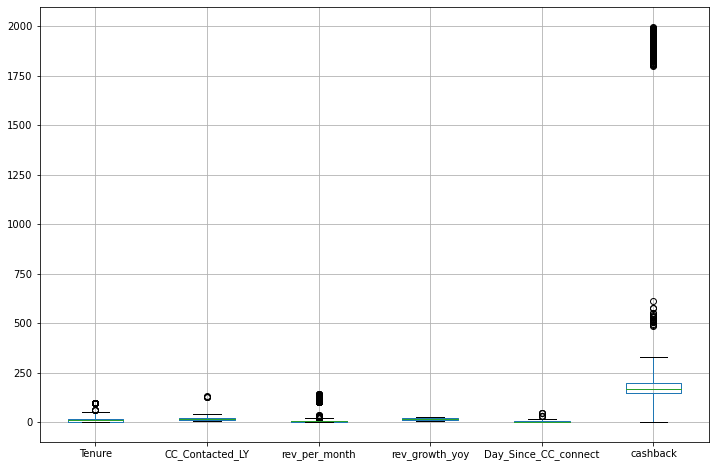

In [ ]:
df[['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','Day_Since_CC_connect','cashback']].boxplot(figsize=(12,8), whis = 3.0)

After changing the whis = 3.0 still we observe outliers in following variables, which tell us that the outliers are beyond the whis = 3.0 are extremen values and need to be treated. 

1. Tenure
2. CC_Contacted_LY
3. rev_per_month
4. Day_Since_CC_connect
5. cashback

The extreme values identified for the above variables will be treated with IQR method i.e. we will be capping those extreme values to the maximum range i.e. (Q3 + 3.0 x IQR) & minimum range i.e. (Q1 - 3.0 x IQR)

##### Defining the outlier function & Treating the above identified variables

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.nanpercentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(3.0 * IQR)
    ur= Q3+(3.0 * IQR)
    return lr, ur

In [ ]:
out_col=['Tenure','CC_Contacted_LY','rev_per_month','Day_Since_CC_connect','cashback']

In [ ]:
for i in range(0,len(out_col)):
  lr,ur = remove_outlier(df[out_col[i]])
  df[out_col[i]]=np.where(df[out_col[i]]>ur,ur,df[out_col[i]])
  df[out_col[i]]=np.where(df[out_col[i]]<lr,lr,df[out_col[i]])

<AxesSubplot:>

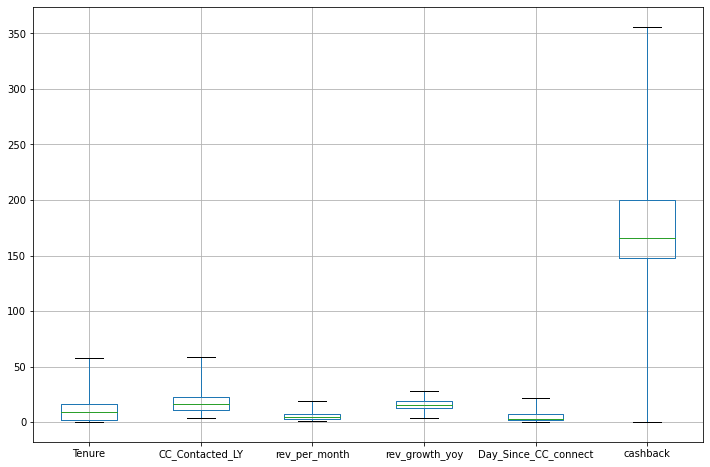

In [ ]:
df[['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','Day_Since_CC_connect','cashback']].boxplot(figsize=(12,8), whis=3.0)

After treating the outliers we can see that there is no presence of outlier further and our data is now good for building the model

Data Encoding

Categorical encoding is a process of converting categories or labels to numbers. There are different ways to do the encoding.

In [6]:
from sklearn.preprocessing import LabelEncoder # Doing Label Encoding

In [7]:
df_copy = df.copy()

In [8]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Payment', 'Gender', 'account_segment', 'Marital_Status',
       'Login_device'],
      dtype='object')

In [9]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print('\n')
        print('feature:', feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        labelencoder = LabelEncoder()
        df[feature] = labelencoder.fit_transform(df[feature])



feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet', 'Unknown']
Categories (6, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI', 'Unknown']
[2 4 1 0 3 5]


feature: Gender
['Female', 'Male', 'Unknown']
Categories (3, object): ['Female', 'Male', 'Unknown']
[0 1 2]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Unknown', 'Super Plus']
Categories (6, object): ['HNI', 'Regular', 'Regular Plus', 'Super', 'Super Plus', 'Unknown']
[3 2 1 0 5 4]


feature: Marital_Status
['Single', 'Divorced', 'Married', 'Unknown']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unknown']
[2 0 1 3]


feature: Login_device
['Mobile', 'Computer', 'Unknown']
Categories (3, object): ['Computer', 'Mobile', 'Unknown']
[1 0 2]


In [10]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Payment,Gender,account_segment,Marital_Status,Login_device
0,1,4,3,6,3,3,2,9,1,11,1,5,160,2,0,3,2,1
1,1,0,1,8,3,4,3,7,1,15,0,0,121,4,1,2,2,1
2,1,0,1,30,2,4,3,6,1,14,0,3,164,2,1,2,2,1
3,1,0,3,15,2,4,5,8,0,23,0,3,134,2,1,3,2,1
4,1,0,1,12,2,3,5,3,0,11,1,3,130,1,1,2,2,1


Splitting the Data into Train & Test

In [11]:
X = df.drop('Churn',axis=1) #Copy all predictor variables into X dataframe

y = df['Churn'] # Copy target variable into the y dataframe

In [12]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 3,stratify = y )

In [13]:
X_train.shape

(7697, 17)

In [14]:
X_test.shape

(3299, 17)

In [15]:
y_train.value_counts(normalize = True) # Checking the unique values of Target variable in Training Set

0    0.831623
1    0.168377
Name: Churn, dtype: float64

In [16]:
y_test.value_counts(normalize = True) # Checking the unique values of Target variable in Test Set

0    0.831767
1    0.168233
Name: Churn, dtype: float64

Model Building

Building Model with Default Parameters

1. K-Nearest Neighbours

In [17]:
from sklearn.preprocessing import MinMaxScaler # Since KNN is a distance based model, scaling is required

In [18]:
# MinMax Scaler
norm = MinMaxScaler()

# fit & transform scaler on training data
X_train_norm = norm.fit_transform(X_train)

# transform test data
X_test_norm = norm.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier #Importing KNN Model from sklearn library

In [20]:
#Creating KNN Model with default parameters
KNN_model = KNeighborsClassifier()

# Fitting the model into the Training Data Set
KNN_model.fit(X_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predicting on Training and Test dataset

In [21]:
y_train_predict_KNN= KNN_model.predict(X_train_norm) #Predicting on Train Set
y_test_predict_KNN = KNN_model.predict(X_test_norm) #Predicting on Test Set

Performance Matrix on Training Data Set

Accuracy Score for Training Set is :  97.21969598544888


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6401
           1       0.95      0.88      0.91      1296

    accuracy                           0.97      7697
   macro avg       0.96      0.93      0.95      7697
weighted avg       0.97      0.97      0.97      7697



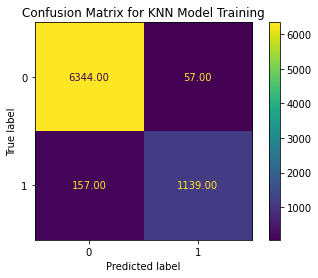

In [22]:
KNN_model_score = (KNN_model.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',KNN_model_score)
print('\n')
plot_confusion_matrix(KNN_model,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix for KNN Model Training',fontsize = 12)
print(metrics.classification_report(y_train,y_train_predict_KNN))

Performance Matrix on Test Data Set

Accuracy Score for Training Set is :  93.96786905122765


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2744
           1       0.87      0.75      0.81       555

    accuracy                           0.94      3299
   macro avg       0.91      0.86      0.89      3299
weighted avg       0.94      0.94      0.94      3299



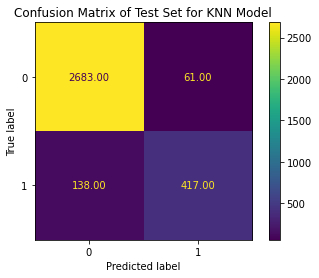

In [23]:
KNN_model_score_test = (KNN_model.score(X_test_norm, y_test)*100)
print('Accuracy Score for Training Set is : ',KNN_model_score_test)
print('\n')
plot_confusion_matrix(KNN_model,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for KNN Model',fontsize = 12)
print(metrics.classification_report(y_test,y_test_predict_KNN))

AUC for Training 99.40426939463548
AUC for Test 96.07700995456098


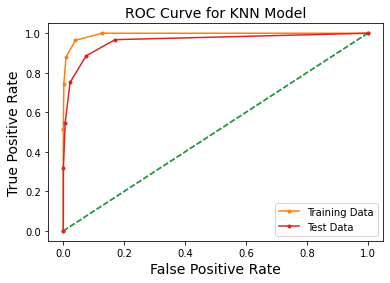

In [24]:
### Training
probs =  KNN_model.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for KNN Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  KNN_model.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

2. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier 

In [26]:
#Creating Random Forest Classifier with default parameters
rfcl = RandomForestClassifier(random_state = 3)

# Fitting the model into the Training Data Set
rfcl = rfcl.fit(X_train, y_train)

In [27]:
# Checking the feature importances

print (pd.DataFrame(rfcl.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending = False)*100)

                         Importance
Tenure                    26.201646
cashback                   7.873372
Day_Since_CC_connect       6.926115
CC_Contacted_LY            6.738924
Complain_ly                6.503111
rev_growth_yoy             5.985818
rev_per_month              5.643016
CC_Agent_Score             5.449823
Payment                    4.640824
Account_user_count         3.957300
Marital_Status             3.915599
account_segment            3.576259
coupon_used_for_payment    3.237700
City_Tier                  2.788833
Login_device               2.473871
Gender                     2.174540
Service_Score              1.913249


In [28]:
ytrain_predict_rfcl = rfcl.predict(X_train) # Predicting on the Train Set
ytest_predict_rfcl = rfcl.predict(X_test) # Predicting on the Test Set

Accuracy Score for Training Set is :  100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6401
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      7697
   macro avg       1.00      1.00      1.00      7697
weighted avg       1.00      1.00      1.00      7697



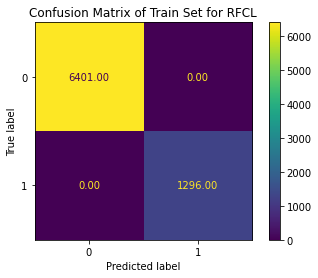

In [29]:
rfcl_model_score = (rfcl.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl,X_train,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for RFCL',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_rfcl))

Accuracy Score for Test Set is :  96.33222188541983


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2744
           1       0.95      0.82      0.88       555

    accuracy                           0.96      3299
   macro avg       0.96      0.91      0.93      3299
weighted avg       0.96      0.96      0.96      3299



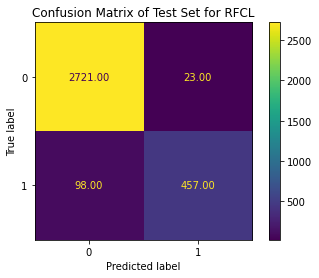

In [30]:
rfcl_model_score = (rfcl.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for RFCL',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_rfcl))

AUC for Training 100.0
AUC for Test 99.15829459196806


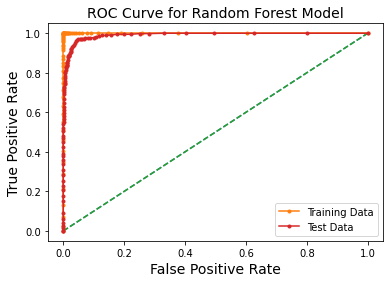

In [31]:
### Training
probs =  rfcl.predict_proba(X_train)
probs = probs[:,1]
plt.title('ROC Curve for Random Forest Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  rfcl.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

3. XG Boost

In [32]:
import xgboost as xgb

In [33]:
#Creating XG Boost Classifier with default parameters
xgboost = xgb.XGBClassifier(random_state = 3)

#Fitting the model into Training Set
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
ytrain_predict_xgb = xgboost.predict(X_train) #Predicting on Train Set
ytest_predict_xgb = xgboost.predict(X_test) #Predicting on Test Set

Accuracy Score for Training Set is :  91.78900870469013


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6401
           1       0.85      0.63      0.72      1296

    accuracy                           0.92      7697
   macro avg       0.89      0.80      0.84      7697
weighted avg       0.91      0.92      0.91      7697



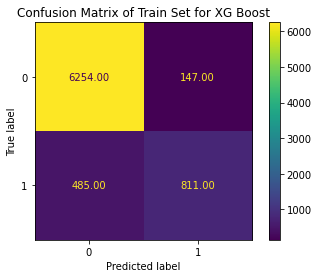

In [35]:
xgb_model_score = (xgboost.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgboost,X_train,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for XG Boost',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_xgb))

Accuracy Score for Test Set is :  90.69414974234617


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2744
           1       0.83      0.56      0.67       555

    accuracy                           0.91      3299
   macro avg       0.87      0.77      0.81      3299
weighted avg       0.90      0.91      0.90      3299



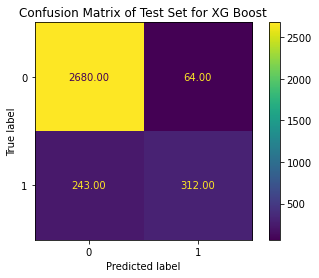

In [36]:
xgb_model_score = (xgboost.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgboost,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for XG Boost',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_xgb))

AUC for Training 95.18072383558895
AUC for Test 93.2856617550495


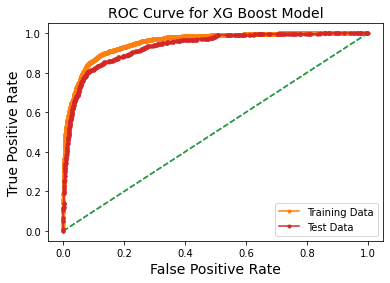

In [37]:
### Training
probs =  xgboost.predict_proba(X_train)
probs = probs[:,1]
plt.title('ROC Curve for XG Boost Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  xgboost.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

4. Neural Network (ANN)

In [38]:
from sklearn.neural_network import MLPClassifier #Importing MLP Classifier

In [39]:
#Creating Neural Network Classifier Model
ann_clf = MLPClassifier()

#Fitting the model into Train Set
ann_clf.fit(X_train_norm,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [40]:
ytrain_predict_ann = ann_clf.predict(X_train_norm) #Predicting on Train Set
ytest_predict_ann = ann_clf.predict(X_test_norm) #Predicting on Test Set

Accuracy Score for Training Set is :  92.77640639210082


              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6401
           1       0.84      0.71      0.77      1296

    accuracy                           0.93      7697
   macro avg       0.89      0.84      0.86      7697
weighted avg       0.93      0.93      0.93      7697



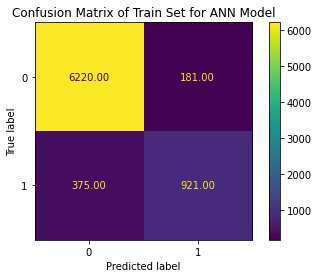

In [41]:
ann_model_score = (ann_clf.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_clf,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for ANN Model',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_ann))

Accuracy Score for Test Set is :  90.81539860563808


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2744
           1       0.79      0.62      0.69       555

    accuracy                           0.91      3299
   macro avg       0.86      0.79      0.82      3299
weighted avg       0.90      0.91      0.90      3299



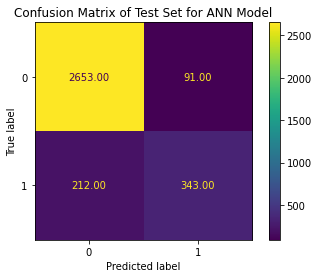

In [42]:
ann_model_score = (ann_clf.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_clf,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for ANN Model',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_ann))

AUC for Training 96.1210246855719
AUC for Test 93.17613531899246


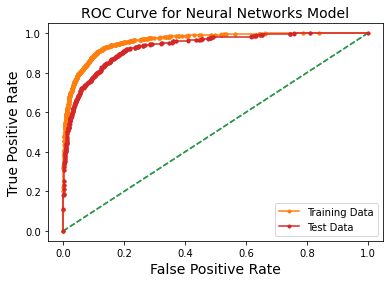

In [43]:
### Training
probs =  ann_clf.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for Neural Networks Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  ann_clf.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

5. Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression #Importing Logistic Regression Model

In [45]:
#Creating Logistic Regression Model
lr = LogisticRegression()

#Fitting the model to Train Set
lr.fit(X_train_norm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
ytrain_predict_lr = lr.predict(X_train_norm) #Predicting on Train Set
ytest_predict_lr = lr.predict(X_test_norm) #Predicting on Test Set

Accuracy Score for Training Set is :  88.34610887358711


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6401
           1       0.79      0.42      0.55      1296

    accuracy                           0.88      7697
   macro avg       0.84      0.70      0.74      7697
weighted avg       0.88      0.88      0.87      7697



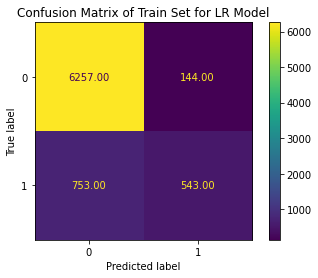

In [47]:
lr_model_score = (lr.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for LR Model',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_lr))

Accuracy Score for Test Set is :  87.29918157017278


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2744
           1       0.74      0.38      0.50       555

    accuracy                           0.87      3299
   macro avg       0.81      0.68      0.72      3299
weighted avg       0.86      0.87      0.86      3299



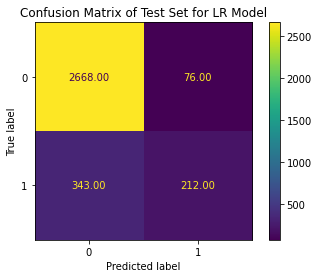

In [48]:
lr_model_score = (lr.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for LR Model',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_lr))

AUC for Training 87.19042983253003
AUC for Test 84.26496467312793


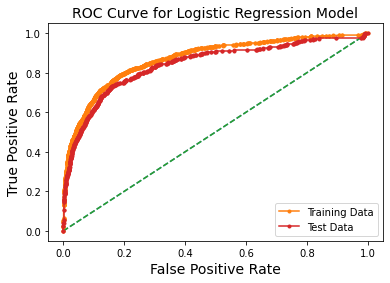

In [49]:
### Training
probs =  lr.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for Logistic Regression Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  lr.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

6. Support Vector Machine

In [50]:
from sklearn import svm #Importing Support Vector Classifier

In [51]:
#Creating Support Vector Classifier Model
svc = svm.SVC(probability=True,gamma='auto')

#Fitting the model to Train Data
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
ytrain_predict_svc = svc.predict(X_train) #Predicting on Train Set
ytest_predict_svc = svc.predict(X_test) #Predicting on Test Set

Accuracy Score for Training Set is :  98.89567363908016


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6401
           1       0.99      0.94      0.97      1296

    accuracy                           0.99      7697
   macro avg       0.99      0.97      0.98      7697
weighted avg       0.99      0.99      0.99      7697



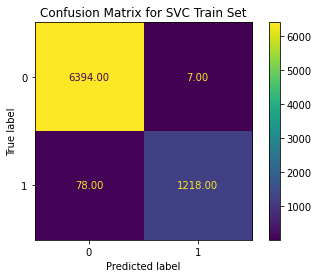

In [53]:
svc_model_score = (svc.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',svc_model_score)
print('\n')
plot_confusion_matrix(svc,X_train,y_train,values_format= '.2f')
plt.title('Confusion Matrix for SVC Train Set',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_svc))

Accuracy Score for Test Set is :  87.20824492270384


              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2744
           1       0.84      0.30      0.44       555

    accuracy                           0.87      3299
   macro avg       0.86      0.64      0.68      3299
weighted avg       0.87      0.87      0.85      3299



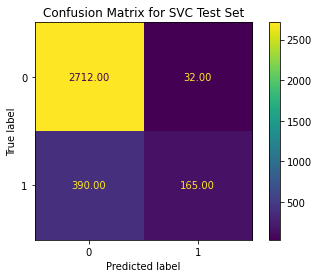

In [54]:
svc_model_score = (svc.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',svc_model_score)
print('\n')
plot_confusion_matrix(svc,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix for SVC Test Set',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_svc))

AUC for Training 99.95163757206146
AUC for Test 91.39390118981956


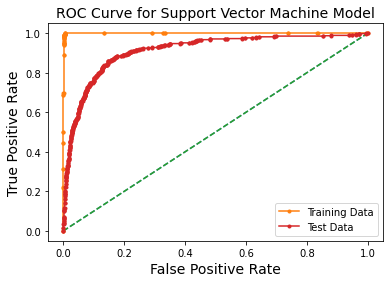

In [55]:
### Training
probs = svc.predict_proba(X_train)
probs = probs[:,1]
plt.title('ROC Curve for Support Vector Machine Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  svc.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Building Model (Hyper Tuning)

In [56]:
from sklearn.model_selection import RandomizedSearchCV #Importing RandomSearch CV

1. k-Nearest Neighbours - Hypertuned

In [57]:
#Defining the parameters into grid

grid_knn = {'n_neighbors':[5,10,15,20],
            'weights':['uniform','distance'],
            'leaf_size' : [30,50,70],
            'algorithm' : ['auto'],
            'p' : (1,2),
            'metric' : ['minkowski', 'chebyshev']}

In [58]:
#Building KNN Model with default parameters
knn_tuned = KNeighborsClassifier()

#Building Random Search
random_search_knn = RandomizedSearchCV(estimator = knn_tuned, param_distributions = grid_knn, cv= 5, random_state = 3, n_jobs = -1, n_iter = 30)

#Fitting to Train set
random_search_knn.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': [30, 50, 70],
                                        'metric': ['minkowski', 'chebyshev'],
                                        'n_neighbors': [5, 10, 15, 20],
                                        'p': (1, 2),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=3, refi

In [59]:
print(random_search_knn.best_params_,'\n') #Getting the best parameters

{'weights': 'distance', 'p': 1, 'n_neighbors': 10, 'metric': 'minkowski', 'leaf_size': 30, 'algorithm': 'auto'} 



In [60]:
knn_tuned = random_search_knn.best_estimator_  #Creating the model with best parameters
knn_tuned

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                     weights='distance')

In [61]:
ytrain_pred_knn_tuned = knn_tuned.predict(X_train_norm) #Predicting on Train Set
ytest_pred_knn_tuned = knn_tuned.predict(X_test_norm) #Predicting on Test Set

Accuracy Score for Training Set is :  100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6401
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      7697
   macro avg       1.00      1.00      1.00      7697
weighted avg       1.00      1.00      1.00      7697



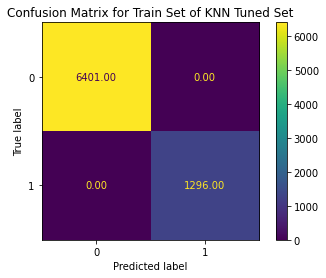

In [62]:
knn_tuned_train_score = (knn_tuned.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',knn_tuned_train_score)
print('\n')
plot_confusion_matrix(knn_tuned,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix for Train Set of KNN Tuned Set',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_pred_knn_tuned))

Accuracy Score for Test Set is :  95.99878751136708


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2744
           1       0.95      0.81      0.87       555

    accuracy                           0.96      3299
   macro avg       0.96      0.90      0.92      3299
weighted avg       0.96      0.96      0.96      3299



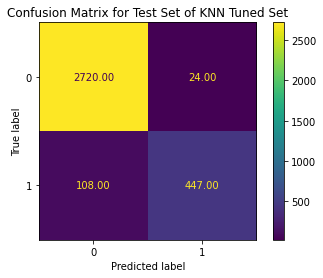

In [63]:
knn_tuned_test_score = (knn_tuned.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',knn_tuned_test_score)
print('\n')
plot_confusion_matrix(knn_tuned,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix for Test Set of KNN Tuned Set',fontsize = 12)
print(metrics.classification_report(y_test,ytest_pred_knn_tuned))

AUC & ROC For KNN Tuned Model

AUC for Training 100.0
AUC for Test 98.88592309510676


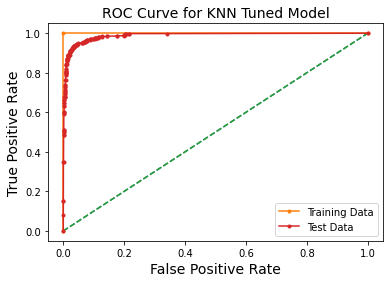

In [64]:
### Training
probs = knn_tuned.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for KNN Tuned Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  knn_tuned.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

2. Random Forest Classifier (Tuned)

In [65]:
from sklearn.ensemble import RandomForestClassifier 

In [66]:
# Defining the parameters into grid
grid_rfcl = {'max_depth' : [10,15],
             'min_samples_split' : [60,80,100],
             'max_features' : [3,4,5],
             'n_estimators' : [100,200,300]}

In [67]:
#Building RFCL Model with default parameters
rfcl_tuned = RandomForestClassifier()

#Building Random Search
random_search_rfcl = RandomizedSearchCV(estimator = rfcl_tuned, param_distributions = grid_rfcl, cv= 5, random_state = 3, n_jobs = -1, n_iter = 20 )

#Fitting to Train set
random_search_rfcl.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [68]:
print(random_search_rfcl.best_params_,'\n') #Getting the best parameters

{'n_estimators': 100, 'min_samples_split': 60, 'max_features': 4, 'max_depth': 10} 



In [69]:
rfcl_tuned = random_search_rfcl.best_estimator_  #Creating the model with best parameters
rfcl_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
# Checking the feature importances

print (pd.DataFrame(rfcl_tuned.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending = False)*100)

                         Importance
Tenure                    44.289206
Complain_ly               11.245708
Day_Since_CC_connect       6.014378
cashback                   5.162366
Marital_Status             4.420248
account_segment            4.083865
rev_per_month              3.883577
CC_Agent_Score             3.543409
CC_Contacted_LY            3.414131
Payment                    2.733944
Account_user_count         2.629459
rev_growth_yoy             2.334564
City_Tier                  2.076463
coupon_used_for_payment    1.730918
Login_device               1.389258
Gender                     0.662629
Service_Score              0.385878


In [71]:
ytrain_predict_rfcl_tuned = rfcl_tuned.predict(X_train) # Predicting on the Train Set
ytest_predict_rfcl_tuned = rfcl_tuned.predict(X_test) # Predicting on the Test Set

Accuracy Score for Training Set is :  92.16577887488631


              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6401
           1       0.90      0.60      0.72      1296

    accuracy                           0.92      7697
   macro avg       0.91      0.80      0.84      7697
weighted avg       0.92      0.92      0.92      7697



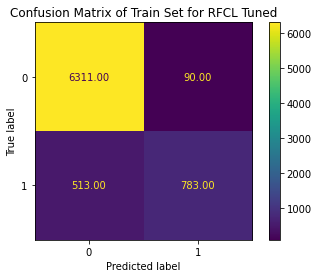

In [72]:
rfcl_model_score = (rfcl_tuned.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_tuned,X_train,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for RFCL Tuned',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_rfcl_tuned))

Accuracy Score for Training Set is :  90.60321309487723


              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2744
           1       0.85      0.54      0.66       555

    accuracy                           0.91      3299
   macro avg       0.88      0.76      0.80      3299
weighted avg       0.90      0.91      0.90      3299



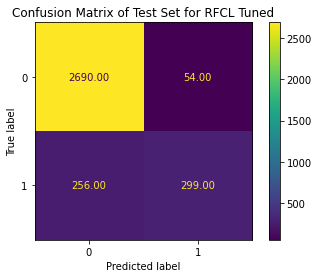

In [73]:
rfcl_model_score = (rfcl_tuned.score(X_test, y_test)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_tuned,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for RFCL Tuned',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_rfcl_tuned))

AUC for Training 96.659617228018
AUC for Test 94.68481601134663


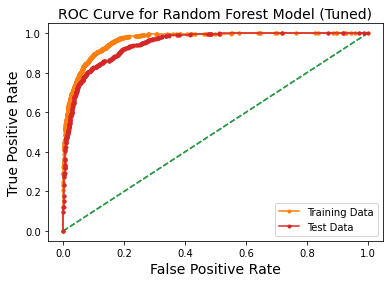

In [74]:
### Training
probs =  rfcl_tuned.predict_proba(X_train)
probs = probs[:,1]
plt.title('ROC Curve for Random Forest Model (Tuned)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  rfcl_tuned.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

3. XG Boost (Tuned)

In [75]:
# Defining the parameters into grid
grid_xgb = {'max_depth' : [5,10],
             'learning_rate' : [0.01,0.001],
             'subsample' : [0.8, 1],
             'n_estimators' : [100,200,300],
             'gamma': [0,1,5],
             'colsample_bytree': [0.3, 0.5, 0.8]}

In [76]:
#Building XG Boost Model with default parameters
xgb_tuned = xgb.XGBClassifier()

#Building Random Search
random_search_xgb = RandomizedSearchCV(estimator = xgb_tuned, param_distributions = grid_xgb, cv= 5, random_state = 3, n_jobs = 50)

#Fitting to Train set
random_search_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [77]:
print(random_search_xgb.best_params_,'\n') #Getting the best parameters

{'subsample': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8} 



In [78]:
xgb_tuned = random_search_xgb.best_estimator_  #Creating the model with best parameters
xgb_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [79]:
ytrain_predict_xgb_tuned = xgb_tuned.predict(X_train) # Predicting on the Train Set
ytest_predict_xgm_tuned = xgb_tuned.predict(X_test) # Predicting on the Test Set

Accuracy Score for Training Set is :  98.09016499935039


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6401
           1       1.00      0.89      0.94      1296

    accuracy                           0.98      7697
   macro avg       0.99      0.94      0.96      7697
weighted avg       0.98      0.98      0.98      7697



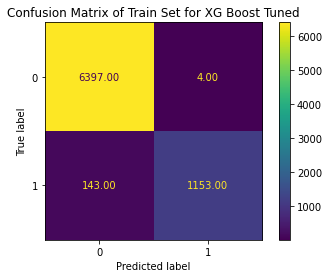

In [80]:
xgb_model_score = (xgb_tuned.score(X_train, y_train)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgb_tuned,X_train,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for XG Boost Tuned',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_xgb_tuned))

Accuracy Score for Training Set is :  94.63473779933314


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2744
           1       0.94      0.73      0.82       555

    accuracy                           0.95      3299
   macro avg       0.94      0.86      0.89      3299
weighted avg       0.95      0.95      0.94      3299



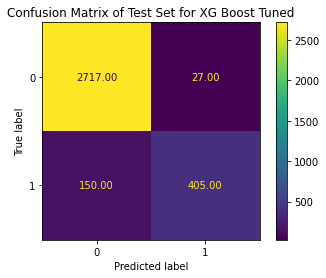

In [81]:
xgb_model_score = (xgb_tuned.score(X_test, y_test)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgb_tuned,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for XG Boost Tuned',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_xgm_tuned))

AUC for Training 99.73917800266548
AUC for Test 98.19123788511543


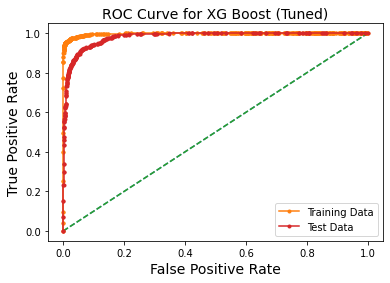

In [82]:
### Training
probs =  xgb_tuned.predict_proba(X_train)
probs =  probs[:,1]
plt.title('ROC Curve for XG Boost (Tuned)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  xgb_tuned.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

4. Neural Network (Tuned)

In [83]:
grid_ann = {'hidden_layer_sizes' : [300,500],
             'max_iter' : [300,500],
             'solver' : ['adam', 'sgd'],
             'tol' : [0.01,0.001],
             'activation': ['relu','tanh']}

In [84]:
#Building ANN Model with default parameters
ann_tuned = MLPClassifier()

#Building Random Search
random_search_ann = RandomizedSearchCV(estimator = ann_tuned, param_distributions = grid_ann, cv= 5, random_state = 3, n_jobs = -1, n_iter = 15)

#Fitting to Train set
random_search_ann.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                           solver='adam', tol=0.0001,
                                           validation_fraction=0.1,
                                         

In [85]:
print(random_search_ann.best_params_,'\n') #Getting the best parameters

{'tol': 0.001, 'solver': 'adam', 'max_iter': 300, 'hidden_layer_sizes': 300, 'activation': 'relu'} 



In [86]:
ann_tuned = random_search_ann.best_estimator_  #Creating the model with best parameters
ann_tuned

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [87]:
ytrain_predict_ann = ann_tuned.predict(X_train_norm) #Predicting on Train Set
ytest_predict_ann = ann_tuned.predict(X_test_norm) #Predicting on Test Set

Accuracy Score for Training Set is :  95.0630115629466


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6401
           1       0.92      0.78      0.84      1296

    accuracy                           0.95      7697
   macro avg       0.94      0.88      0.91      7697
weighted avg       0.95      0.95      0.95      7697



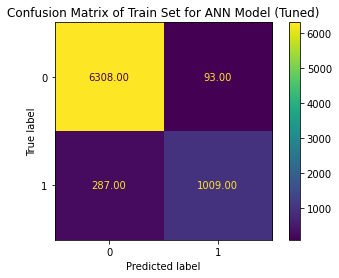

In [88]:
ann_model_score = (ann_tuned.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_tuned,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for ANN Model (Tuned)',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_ann))

Accuracy Score for Test Set is :  92.02788723855714


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2744
           1       0.85      0.64      0.73       555

    accuracy                           0.92      3299
   macro avg       0.89      0.81      0.84      3299
weighted avg       0.92      0.92      0.92      3299



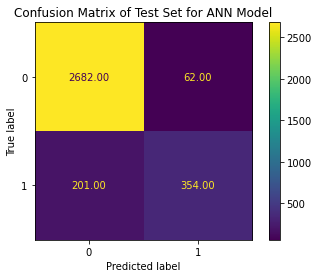

In [89]:
ann_model_score = (ann_tuned.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_tuned,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for ANN Model',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_ann))

AUC for Training 98.22172847221016
AUC for Test 95.23146324166733


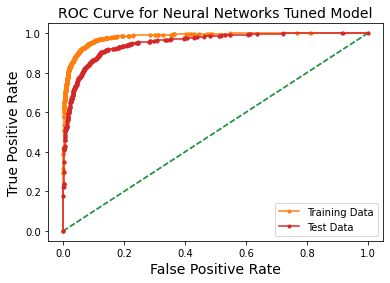

In [90]:
### Training
probs =  ann_tuned.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for Neural Networks Tuned Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  ann_tuned.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

5. Logistic Regression (Tuned)

In [91]:
grid_lr = {'tol' : [0.001,0.0001,0.00001],
             'max_iter' : [100,300,500],
             'solver' : ['newton-cg','lbfgs','saga'],
             'penalty' : ['l2','none'],
              'class_weight' : ['balanced', 'none']}

In [92]:
#Building LR Model with default parameters
lr_tuned = LogisticRegression(random_state = 3)

#Building Random Search
random_search_lr = RandomizedSearchCV(estimator = lr_tuned, param_distributions = grid_lr, cv= 5, n_jobs = -1, n_iter = 40)

#Fitting to Train set
random_search_lr.fit(X_train_norm,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=3,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', 'none'],
                                        'max_iter': [100, 300, 500],
                                        'penalty': ['l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs',

In [93]:
print(random_search_lr.best_params_,'\n') #Getting the best parameters

{'tol': 1e-05, 'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 300, 'class_weight': 'none'} 



In [94]:
lr_tuned = random_search_lr.best_estimator_  #Creating the model with best parameters
lr_tuned

LogisticRegression(C=1.0, class_weight='none', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=3, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [95]:
ytrain_predict_lr = lr_tuned.predict(X_train_norm) #Predicting on Train Set
ytest_predict_lr = lr_tuned.predict(X_test_norm) #Predicting on Test Set

Accuracy Score for Training Set is :  88.61894244510849


              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6401
           1       0.78      0.46      0.57      1296

    accuracy                           0.89      7697
   macro avg       0.84      0.71      0.75      7697
weighted avg       0.88      0.89      0.87      7697



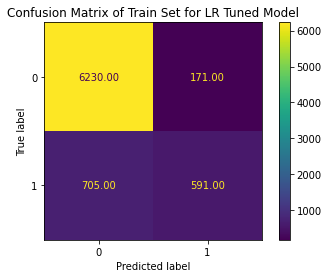

In [96]:
lr_model_score = (lr_tuned.score(X_train_norm, y_train)*100)
print('Accuracy Score for Training Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_tuned,X_train_norm,y_train,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for LR Tuned Model',fontsize = 12)
print(metrics.classification_report(y_train,ytrain_predict_lr))

Accuracy Score for Test Set is :  87.63261594422552


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2744
           1       0.74      0.41      0.53       555

    accuracy                           0.88      3299
   macro avg       0.81      0.69      0.73      3299
weighted avg       0.86      0.88      0.86      3299



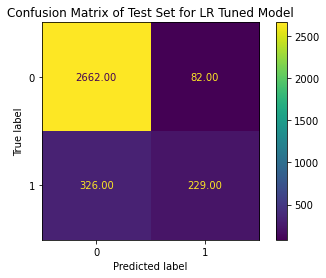

In [97]:
lr_model_score = (lr_tuned.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_tuned,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for LR Tuned Model',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_lr))

AUC for Training 87.37663482364829
AUC for Test 84.53260841015945


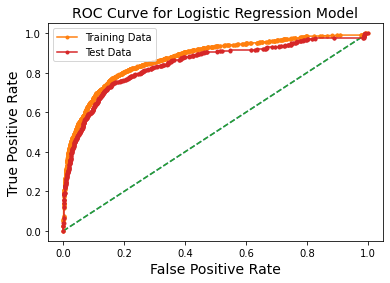

In [98]:
### Training
probs =  lr_tuned.predict_proba(X_train_norm)
probs = probs[:,1]
plt.title('ROC Curve for Logistic Regression Model',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  lr_tuned.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Applying SMOTE

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state = 3)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1296
Before OverSampling, counts of label '0': 6401 

After OverSampling, the shape of train_X: (12802, 17)
After OverSampling, the shape of train_y: (12802,) 

After OverSampling, counts of label '1': 6401
After OverSampling, counts of label '0': 6401


Building Model (Default Parameters) With Balanced Dataset

1. KNN Model with Default Parameters (Balanced)

In [101]:
# MinMax Scaler
norm = MinMaxScaler()

# fit & transform scaler on training data
X_train_norm_res = norm.fit_transform(X_train_res)

# transform test data
X_test_norm = norm.transform(X_test)

In [171]:
#Creating KNN Model with default parameters
KNN_model_balanced = KNeighborsClassifier()

# Fitting the model into the Training Data Set
KNN_model_balanced.fit(X_train_norm_res, y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predicting on Training and Test dataset

In [172]:
y_train_predict_KNN = KNN_model_balanced.predict(X_train_norm_res) #Predicting on Train Set
y_test_predict_KNN  = KNN_model_balanced.predict(X_test_norm) #Predicting on Test Set

Performance Matrix on Training Data Set

Accuracy Score for Training Set is :  96.5161693485393


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      6401
           1       0.95      0.98      0.97      6401

    accuracy                           0.97     12802
   macro avg       0.97      0.97      0.97     12802
weighted avg       0.97      0.97      0.97     12802



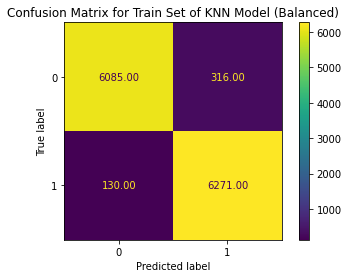

In [173]:
KNN_model_score = (KNN_model_balanced.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',KNN_model_score)
print('\n')
plot_confusion_matrix(KNN_model_balanced,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix for Train Set of KNN Model (Balanced)',fontsize = 12)
print(metrics.classification_report(y_train_res,y_train_predict_KNN))

Performance Matrix on Test Data Set

Accuracy Score for Training Set is :  89.57259775689603


              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2744
           1       0.64      0.88      0.74       555

    accuracy                           0.90      3299
   macro avg       0.81      0.89      0.84      3299
weighted avg       0.92      0.90      0.90      3299



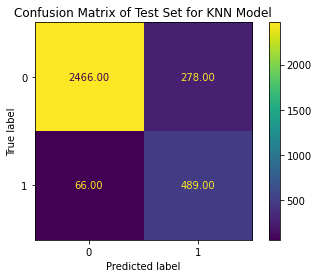

In [174]:
KNN_model_score_test = (KNN_model_balanced.score(X_test_norm, y_test)*100)
print('Accuracy Score for Training Set is : ',KNN_model_score_test)
print('\n')
plot_confusion_matrix(KNN_model_balanced,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for KNN Model',fontsize = 12)
print(metrics.classification_report(y_test,y_test_predict_KNN))

AUC for Training 99.56898724107243
AUC for Test 95.17115147217187


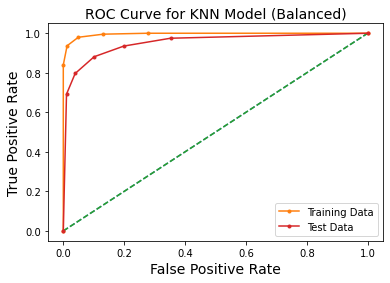

In [175]:
### Training
probs =  KNN_model_balanced.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for KNN Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  KNN_model_balanced.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Random Forest with Default Parameters (Balanced)

In [176]:
#Creating Random Forest Classifier with default parameters
rfcl_balanced = RandomForestClassifier()

# Fitting the model into the Training Data Set
rfcl_balanced.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
# Checking the feature importances

print (pd.DataFrame(rfcl_balanced.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending = False)*100)

                         Importance
Tenure                    31.662936
cashback                   8.809142
Day_Since_CC_connect       7.777259
account_segment            6.657390
CC_Contacted_LY            5.863554
rev_growth_yoy             5.443669
CC_Agent_Score             4.545347
rev_per_month              4.502228
Payment                    3.955741
Account_user_count         3.060309
Login_device               3.012760
City_Tier                  2.885554
coupon_used_for_payment    2.877742
Complain_ly                2.588715
Marital_Status             2.388959
Service_Score              2.053297
Gender                     1.915397


In [178]:
ytrain_predict_rfcl = rfcl_balanced.predict(X_train_res) # Predicting on the Train Set
ytest_predict_rfcl = rfcl_balanced.predict(X_test) # Predicting on the Test Set

Accuracy Score for Training Set is :  100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6401
           1       1.00      1.00      1.00      6401

    accuracy                           1.00     12802
   macro avg       1.00      1.00      1.00     12802
weighted avg       1.00      1.00      1.00     12802



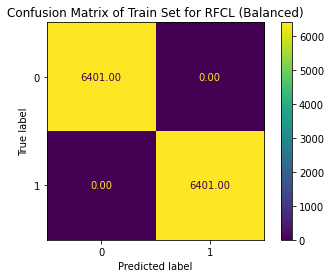

In [179]:
rfcl_model_score = (rfcl_balanced.score(X_train_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_balanced,X_train_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for RFCL (Balanced)',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_rfcl))

Accuracy Score for Test Set is :  95.5744164898454


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2744
           1       0.86      0.89      0.87       555

    accuracy                           0.96      3299
   macro avg       0.92      0.93      0.92      3299
weighted avg       0.96      0.96      0.96      3299



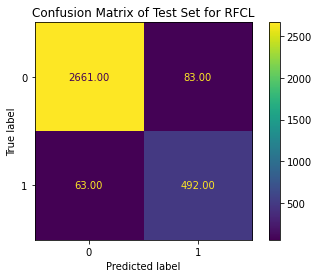

In [180]:
rfcl_model_score = (rfcl_balanced.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_balanced,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for RFCL',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_rfcl))

AUC for Training 100.0
AUC for Test 98.70905891314055


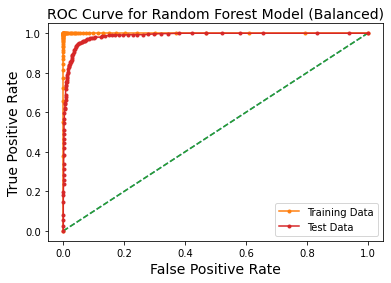

In [181]:
### Training
probs =  rfcl_balanced.predict_proba(X_train_res)
probs = probs[:,1]
plt.title('ROC Curve for Random Forest Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  rfcl_balanced.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

3. XG Boost with Default Parameters (Balanced)

In [113]:
#Creating XG Boost Classifier(Balanced Dataset) with default parameters
xgboost_balanced = xgb.XGBClassifier(random_state = 3)

#Fitting the model into Training Set
xgboost_balanced.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=3,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [114]:
ytrain_predict_xgb = xgboost_balanced.predict(X_train_res) #Predicting on Train Set
ytest_predict_xgb = xgboost_balanced.predict(X_test.values) #Predicting on Test Set

Accuracy Score for Training Set is :  87.3066708326824


              precision    recall  f1-score   support

           0       0.87      0.88      0.87      6401
           1       0.88      0.87      0.87      6401

    accuracy                           0.87     12802
   macro avg       0.87      0.87      0.87     12802
weighted avg       0.87      0.87      0.87     12802



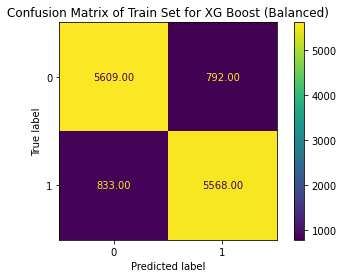

In [115]:
xgb_model_score = (xgboost_balanced.score(X_train_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgboost_balanced,X_train_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for XG Boost (Balanced)',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_xgb))

Accuracy Score for Test Set is :  86.78387390118218


              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2744
           1       0.58      0.77      0.66       555

    accuracy                           0.87      3299
   macro avg       0.77      0.83      0.79      3299
weighted avg       0.89      0.87      0.87      3299



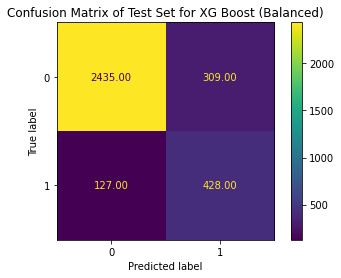

In [116]:
xgb_model_score = (xgboost_balanced.score(X_test.values, y_test)*100)
print('Accuracy Score for Test Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgboost_balanced,X_test.values,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for XG Boost (Balanced)',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_xgb))

AUC for Training 94.73885370931806
AUC for Test 90.94962309248022


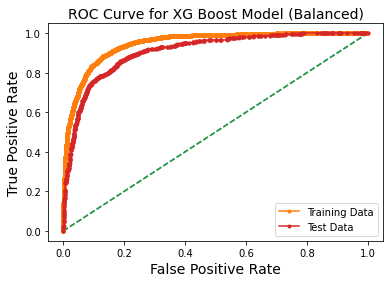

In [117]:
### Training
probs =  xgboost_balanced.predict_proba(X_train_res)
probs = probs[:,1]
plt.title('ROC Curve for XG Boost Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  xgboost_balanced.predict_proba(X_test.values)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

4. Neural Network ANN with Default Parameters (Balanced)

In [118]:
from sklearn.neural_network import MLPClassifier #Importing MLP Classifier

In [182]:
#Creating Neural Network Classifier Model
ann_clf_balanced = MLPClassifier()

#Fitting the model into Train Set
ann_clf_balanced.fit(X_train_norm_res,y_train_res)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [183]:
ytrain_predict_ann = ann_clf_balanced.predict(X_train_norm_res) #Predicting on Train Set
ytest_predict_ann = ann_clf_balanced.predict(X_test_norm) #Predicting on Test Set

Accuracy Score for Training Set is :  90.3608811123262


              precision    recall  f1-score   support

           0       0.90      0.91      0.90      6401
           1       0.91      0.89      0.90      6401

    accuracy                           0.90     12802
   macro avg       0.90      0.90      0.90     12802
weighted avg       0.90      0.90      0.90     12802



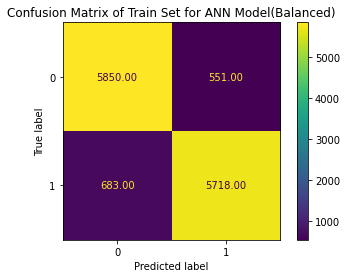

In [184]:
ann_model_score = (ann_clf_balanced.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_clf_balanced,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for ANN Model(Balanced)',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_ann))

Accuracy Score for Test Set is :  88.36010912397695


              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2744
           1       0.63      0.74      0.68       555

    accuracy                           0.88      3299
   macro avg       0.79      0.83      0.80      3299
weighted avg       0.89      0.88      0.89      3299



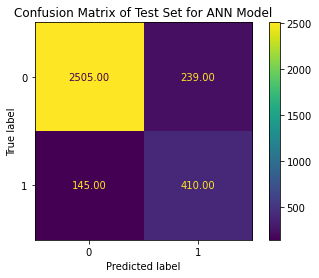

In [185]:
ann_model_score = (ann_clf_balanced.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_clf_balanced,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for ANN Model',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_ann))

AUC for Training 96.53730776180032
AUC for Test 91.43513776166839


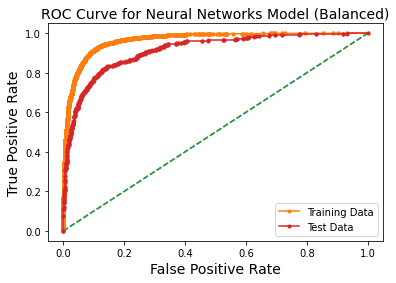

In [186]:
### Training
probs =  ann_clf_balanced.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for Neural Networks Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  ann_clf_balanced.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

5. Logistic Regression with Default Parameters (Balanced)

In [124]:
from sklearn.linear_model import LogisticRegression #Importing Logistic Regression Model

In [125]:
#Creating Logistic Regression Model
lr_balanced = LogisticRegression()

#Fitting the model to Train Set
lr_balanced.fit(X_train_norm_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
ytrain_predict_lr = lr_balanced.predict(X_train_norm_res) #Predicting on Train Set
ytest_predict_lr = lr_balanced.predict(X_test_norm) #Predicting on Test Set

Accuracy Score for Training Set is :  78.55803780659272


              precision    recall  f1-score   support

           0       0.81      0.75      0.78      6401
           1       0.76      0.83      0.79      6401

    accuracy                           0.79     12802
   macro avg       0.79      0.79      0.79     12802
weighted avg       0.79      0.79      0.79     12802



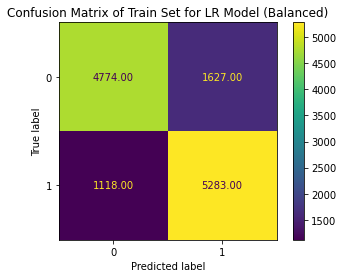

In [127]:
lr_model_score = (lr_balanced.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_balanced,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for LR Model (Balanced)',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_lr))

Accuracy Score for Test Set is :  76.08366171567141


              precision    recall  f1-score   support

           0       0.94      0.76      0.84      2744
           1       0.39      0.75      0.51       555

    accuracy                           0.76      3299
   macro avg       0.66      0.76      0.68      3299
weighted avg       0.85      0.76      0.79      3299



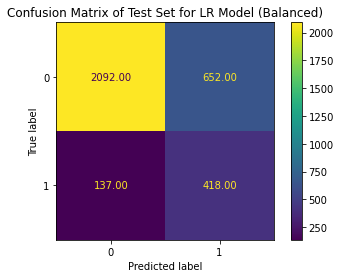

In [128]:
lr_model_score = (lr_balanced.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_balanced,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for LR Model (Balanced)',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_lr))

AUC for Training 86.1662594168263
AUC for Test 82.36066241168282


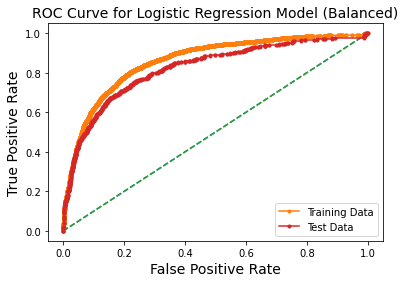

In [129]:
### Training
probs =  lr_balanced.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for Logistic Regression Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  lr_balanced.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

Support Vector (Balanced & Default Parameters)

In [130]:
#Creating Support Vector Classifier Model
svc_balanced = svm.SVC(probability=True,gamma='auto')

#Fitting the model to Train Data
svc_balanced.fit(X_train_res,y_train_res)

ytrain_predict_svc = svc_balanced.predict(X_train_res) #Predicting on Train Set

ytest_predict_svc = svc_balanced.predict(X_test) #Predicting on Test Set

Accuracy Score for Training Set is :  99.67192626152163


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6401
           1       0.99      1.00      1.00      6401

    accuracy                           1.00     12802
   macro avg       1.00      1.00      1.00     12802
weighted avg       1.00      1.00      1.00     12802



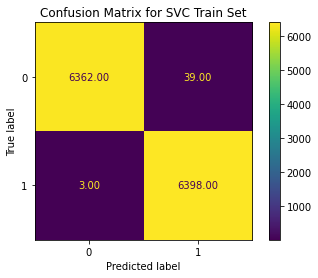

In [131]:
svc_model_score = (svc_balanced.score(X_train_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',svc_model_score)
print('\n')
plot_confusion_matrix(svc_balanced,X_train_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix for SVC Train Set',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_svc))

Accuracy Score for Test Set is :  88.51167020309184


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2744
           1       0.74      0.49      0.59       555

    accuracy                           0.89      3299
   macro avg       0.82      0.73      0.76      3299
weighted avg       0.88      0.89      0.88      3299



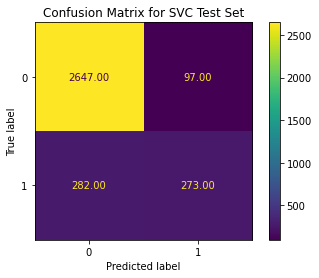

In [132]:
svc_model_score = (svc_balanced.score(X_test, y_test)*100)
print('Accuracy Score for Test Set is : ',svc_model_score)
print('\n')
plot_confusion_matrix(svc_balanced,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix for SVC Test Set',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_svc))

AUC for Training 99.9952236606914
AUC for Test 91.4649489139285


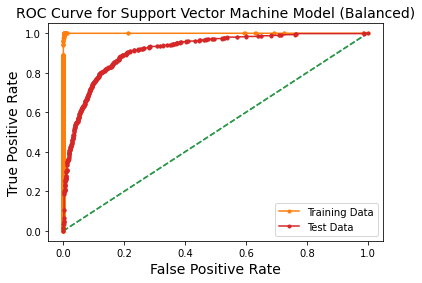

In [133]:
### Training
probs = svc_balanced.predict_proba(X_train_res)
probs = probs[:,1]
plt.title('ROC Curve for Support Vector Machine Model (Balanced)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  svc_balanced.predict_proba(X_test.values)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

1. KNN Model (Balanced With Tuning)

In [134]:
#Defining the parameters into grid

grid_knn = {'n_neighbors':[5,10,15,20],
            'weights':['uniform','distance'],
            'leaf_size' : [30,50,70],
            'algorithm' : ['auto'],
            'p' : (1,2),
            'metric' : ['minkowski', 'chebyshev']}

In [135]:
#Building KNN Model with default parameters
knn_tuned_balanced = KNeighborsClassifier()

#Building Random Search
random_search_knn_bal = RandomizedSearchCV(estimator = knn_tuned_balanced, param_distributions = grid_knn, cv= 5, random_state = 3, n_jobs = -1, n_iter = 30)

#Fitting to Train set
random_search_knn_bal.fit(X_train_norm_res,y_train_res)

print(random_search_knn_bal.best_params_,'\n') #Getting the best parameters

knn_tuned_bal = random_search_knn_bal.best_estimator_  #Creating the model with best parameters
knn_tuned_bal

{'weights': 'distance', 'p': 1, 'n_neighbors': 10, 'metric': 'minkowski', 'leaf_size': 30, 'algorithm': 'auto'} 



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                     weights='distance')

In [136]:
ytrain_pred_knn_tuned = knn_tuned_bal.predict(X_train_norm_res) #Predicting on Train Set
ytest_pred_knn_tuned = knn_tuned_bal.predict(X_test_norm) #Predicting on Test Set

Accuracy Score for Training Set is :  100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6401
           1       1.00      1.00      1.00      6401

    accuracy                           1.00     12802
   macro avg       1.00      1.00      1.00     12802
weighted avg       1.00      1.00      1.00     12802



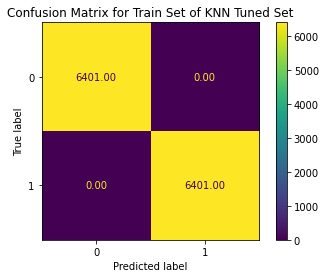

In [137]:
knn_tuned_train_score = (knn_tuned_bal.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',knn_tuned_train_score)
print('\n')
plot_confusion_matrix(knn_tuned_bal,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix for Train Set of KNN Tuned Set',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_pred_knn_tuned))

Accuracy Score for Test Set is :  93.21006365565323


              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2744
           1       0.73      0.96      0.83       555

    accuracy                           0.93      3299
   macro avg       0.86      0.94      0.89      3299
weighted avg       0.95      0.93      0.94      3299



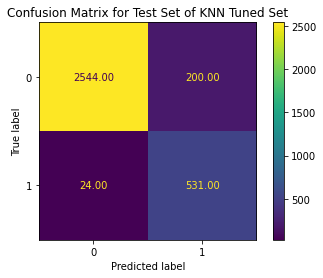

In [138]:
knn_tuned_test_score = (knn_tuned_bal.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',knn_tuned_test_score)
print('\n')
plot_confusion_matrix(knn_tuned_bal,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix for Test Set of KNN Tuned Set',fontsize = 12)
print(metrics.classification_report(y_test,ytest_pred_knn_tuned))

AUC & ROC For KNN Tuned Model

AUC for Training 100.0
AUC for Test 98.28388884511334


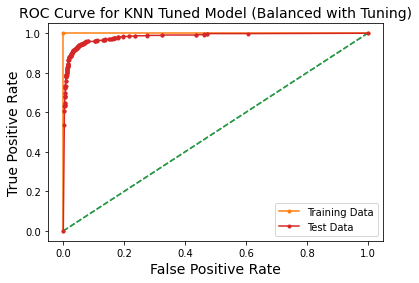

In [139]:
### Training
probs = knn_tuned_bal.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for KNN Tuned Model (Balanced with Tuning)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  knn_tuned_bal.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

2. Random Forest Classifier (Tuned)

In [140]:
from sklearn.ensemble import RandomForestClassifier 

In [141]:
# Defining the parameters into grid
grid_rfcl = {'max_depth' : [10,15],
             'min_samples_split' : [60,80,100],
             'max_features' : [3,4,5],
             'n_estimators' : [100,200,300]}

In [142]:
#Building RFCL Model with default parameters
rfcl_tuned_balanced = RandomForestClassifier()

#Building Random Search
random_search_rfcl_bal = RandomizedSearchCV(estimator = rfcl_tuned_balanced, param_distributions = grid_rfcl, cv= 5, random_state = 3, n_jobs = -1, n_iter = 20 )

#Fitting to Train set
random_search_rfcl_bal.fit(X_train_res,y_train_res)


print(random_search_rfcl_bal.best_params_,'\n') #Getting the best parameters

rfcl_tuned_bal = random_search_rfcl_bal.best_estimator_  #Creating the model with best parameters
rfcl_tuned_bal

{'n_estimators': 100, 'min_samples_split': 60, 'max_features': 3, 'max_depth': 15} 



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [143]:
# Checking the feature importances

print (pd.DataFrame(rfcl_tuned_bal.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values('Importance',ascending = False)*100)

                         Importance
Tenure                    43.408766
Day_Since_CC_connect       8.496344
account_segment            8.280665
cashback                   6.607460
rev_growth_yoy             3.519303
CC_Contacted_LY            3.375255
Login_device               3.290163
CC_Agent_Score             3.261766
Complain_ly                3.096880
Payment                    3.039653
rev_per_month              2.849643
City_Tier                  2.566316
Account_user_count         2.190519
coupon_used_for_payment    1.935792
Marital_Status             1.632981
Service_Score              1.294326
Gender                     1.154167


In [144]:
ytrain_predict_rfcl_tuned_bal =rfcl_tuned_bal.predict(X_train_res) # Predicting on the Train Set

In [145]:
ytest_predict_rfcl_tuned_bal = rfcl_tuned_bal.predict(X_test) # Predicting on the Test Set

Accuracy Score for Training Set is :  92.54022808936104


              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6401
           1       0.92      0.93      0.93      6401

    accuracy                           0.93     12802
   macro avg       0.93      0.93      0.93     12802
weighted avg       0.93      0.93      0.93     12802



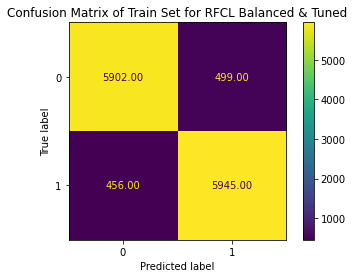

In [146]:
rfcl_model_score = (rfcl_tuned_bal.score(X_train_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_tuned_bal,X_train_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for RFCL Balanced & Tuned',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_rfcl_tuned_bal))

Accuracy Score for Training Set is :  90.26977872082449


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2744
           1       0.67      0.82      0.74       555

    accuracy                           0.90      3299
   macro avg       0.82      0.87      0.84      3299
weighted avg       0.91      0.90      0.91      3299



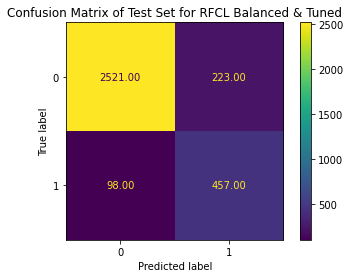

In [147]:
rfcl_model_score = (rfcl_tuned_bal.score(X_test, y_test)*100)
print('Accuracy Score for Training Set is : ',rfcl_model_score)
print('\n')
plot_confusion_matrix(rfcl_tuned_bal,X_test,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for RFCL Balanced & Tuned',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_rfcl_tuned_bal))

AUC for Training 98.16232480664428
AUC for Test 94.58632101489243


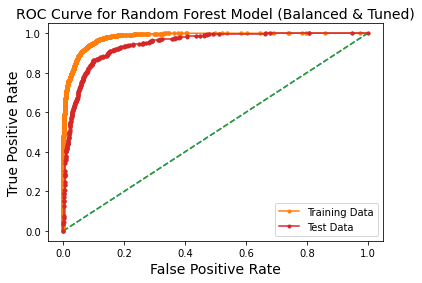

In [148]:
### Training
probs =  rfcl_tuned_bal.predict_proba(X_train_res)
probs = probs[:,1]
plt.title('ROC Curve for Random Forest Model (Balanced & Tuned)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  rfcl_tuned_bal.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

3. XG Boost (Balanced & Tuned)

In [149]:
# Defining the parameters into grid
grid_xgb = {'max_depth' : [5,10],
             'learning_rate' : [0.01,0.001],
             'subsample' : [0.8, 1],
             'n_estimators' : [100,200,300],
             'gamma': [0,1,5],
             'colsample_bytree': [0.3, 0.5, 0.8]}

In [150]:
#Building XG Boost Model with Balanced & Tuned Dataset
xgb_tuned_balaned = xgb.XGBClassifier()

#Building Random Search
random_search_xgb_bal = RandomizedSearchCV(estimator = xgb_tuned_balaned, param_distributions = grid_xgb, cv= 5, random_state = 3, n_jobs = 50)

#Fitting to Train set
random_search_xgb_bal.fit(X_train_res,y_train_res)

print(random_search_xgb_bal.best_params_,'\n') #Getting the best parameters

xgb_tuned_bal = random_search_xgb_bal.best_estimator_  #Creating the model with best parameters
xgb_tuned_bal

{'subsample': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.8} 



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [151]:
ytrain_predict_xgb_tuned_bal = xgb_tuned_bal.predict(X_train_res) # Predicting on the Train Set

In [152]:
ytest_predict_xgm_tuned_bal =xgb_tuned_bal.predict(X_test.values) # Predicting on the Test Set

Accuracy Score for Training Set is :  97.42227776909857


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6401
           1       0.97      0.98      0.97      6401

    accuracy                           0.97     12802
   macro avg       0.97      0.97      0.97     12802
weighted avg       0.97      0.97      0.97     12802



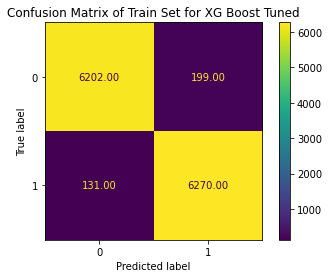

In [153]:
xgb_model_score = (xgb_tuned_bal.score(X_train_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgb_tuned_bal,X_train_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for XG Boost Tuned',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_xgb_tuned_bal))

Accuracy Score for Training Set is :  93.08881479236132


              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2744
           1       0.75      0.87      0.81       555

    accuracy                           0.93      3299
   macro avg       0.86      0.91      0.88      3299
weighted avg       0.94      0.93      0.93      3299



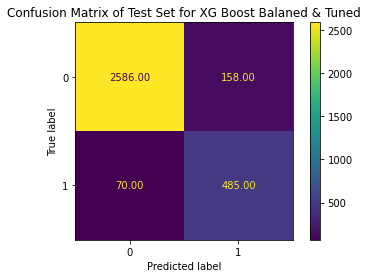

In [154]:
xgb_model_score = (xgb_tuned_bal.score(X_test.values, y_test)*100)
print('Accuracy Score for Training Set is : ',xgb_model_score)
print('\n')
plot_confusion_matrix(xgb_tuned_bal,X_test.values,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for XG Boost Balaned & Tuned',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_xgm_tuned_bal))

AUC for Training 99.70057209415583
AUC for Test 97.28173508785754


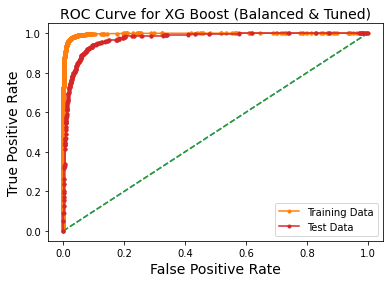

In [155]:
### Training
probs =  xgb_tuned_bal.predict_proba(X_train_res)
probs =  probs[:,1]
plt.title('ROC Curve for XG Boost (Balanced & Tuned)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  xgb_tuned_bal.predict_proba(X_test.values)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

4. Neural Network (Balanced & Tuned)

In [156]:
grid_ann = {'hidden_layer_sizes' : [300,500],
             'max_iter' : [300,500],
             'solver' : ['adam', 'sgd'],
             'tol' : [0.01,0.001],
             'activation': ['relu','tanh']}

In [157]:
#Building Artificial Neural Networks Model with Balanced & Tuned
ann = MLPClassifier()

#Building Random Search
random_search_ann_bal = RandomizedSearchCV(estimator = ann, param_distributions = grid_ann, cv= 5, random_state = 3, n_jobs = -1, n_iter = 15)

#Fitting to Train set
random_search_ann_bal.fit(X_train_norm_res,y_train_res)

print(random_search_ann_bal.best_params_,'\n') #Getting the best parameters

ann_tuned_bal = random_search_ann_bal.best_estimator_  #Creating the model with best parameters
ann_tuned_bal

{'tol': 0.001, 'solver': 'adam', 'max_iter': 500, 'hidden_layer_sizes': 300, 'activation': 'relu'} 



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [158]:
ytrain_predict_ann_bal = ann_tuned_bal.predict(X_train_norm_res) #Predicting on Train Set

In [159]:
ytest_predict_ann_bal = ann_tuned_bal.predict(X_test_norm) #Predicting on Test Set

Accuracy Score for Training Set is :  96.25058584596157


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6401
           1       0.96      0.97      0.96      6401

    accuracy                           0.96     12802
   macro avg       0.96      0.96      0.96     12802
weighted avg       0.96      0.96      0.96     12802



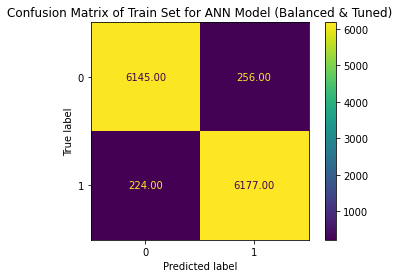

In [160]:
ann_model_score = (ann_tuned_bal.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_tuned_bal,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for ANN Model (Balanced & Tuned)',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_ann_bal))

Accuracy Score for Test Set is :  92.05819945438012


              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2744
           1       0.64      0.77      0.70       555

    accuracy                           0.89      3299
   macro avg       0.80      0.84      0.81      3299
weighted avg       0.90      0.89      0.89      3299



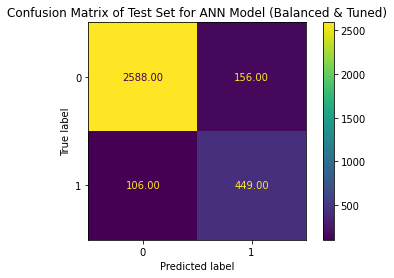

In [161]:
ann_model_score = (ann_tuned_bal.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',ann_model_score)
print('\n')
plot_confusion_matrix(ann_tuned_bal,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for ANN Model (Balanced & Tuned)',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_ann))

AUC for Training 99.23358425019563
AUC for Test 94.97984135739237


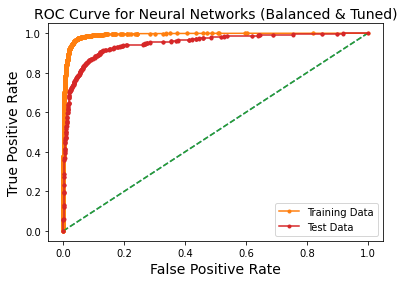

In [162]:
### Training
probs =  ann_tuned_bal.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for Neural Networks (Balanced & Tuned)',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  ann_tuned_bal.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

5. Logistic Regression (Balanced & Tuned)

In [163]:
grid_lr = {'tol' : [0.001,0.0001,0.00001],
             'max_iter' : [100,300,500],
             'solver' : ['newton-cg','lbfgs','saga'],
             'penalty' : ['l2','none'],
              'class_weight' : ['balanced', 'none']}

In [164]:
#Building Logistic Regression Model with Balanced & Tuned Parameters
lr = LogisticRegression(random_state = 3)

#Building Random Search
random_search_lr_bal = RandomizedSearchCV(estimator = lr, param_distributions = grid_lr, cv= 5, n_jobs = -1, n_iter = 40)

#Fitting to Train set
random_search_lr_bal.fit(X_train_norm_res,y_train_res)

print(random_search_lr_bal.best_params_,'\n') #Getting the best parameters

lr_tuned_bal = random_search_lr_bal.best_estimator_  #Creating the model with best parameters
lr_tuned_bal

{'tol': 0.001, 'solver': 'saga', 'penalty': 'none', 'max_iter': 300, 'class_weight': 'balanced'} 



LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=300, multi_class='auto', n_jobs=None,
                   penalty='none', random_state=3, solver='saga', tol=0.001,
                   verbose=0, warm_start=False)

In [165]:
ytrain_predict_lr_bal = lr_tuned_bal.predict(X_train_norm_res) #Predicting on Train Set

In [166]:
ytest_predict_lr_bal = lr_tuned_bal.predict(X_test_norm) #Predicting on Test Set

Accuracy Score for Training Set is :  78.75331979378221


              precision    recall  f1-score   support

           0       0.81      0.75      0.78      6401
           1       0.77      0.83      0.80      6401

    accuracy                           0.79     12802
   macro avg       0.79      0.79      0.79     12802
weighted avg       0.79      0.79      0.79     12802



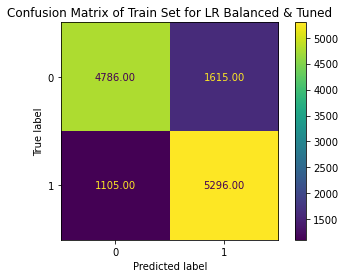

In [167]:
lr_model_score = (lr_tuned_bal.score(X_train_norm_res, y_train_res)*100)
print('Accuracy Score for Training Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_tuned_bal,X_train_norm_res,y_train_res,values_format= '.2f')
plt.title('Confusion Matrix of Train Set for LR Balanced & Tuned',fontsize = 12)
print(metrics.classification_report(y_train_res,ytrain_predict_lr_bal))

Accuracy Score for Test Set is :  76.17459836314035


              precision    recall  f1-score   support

           0       0.94      0.76      0.84      2744
           1       0.39      0.75      0.51       555

    accuracy                           0.76      3299
   macro avg       0.66      0.76      0.68      3299
weighted avg       0.85      0.76      0.79      3299



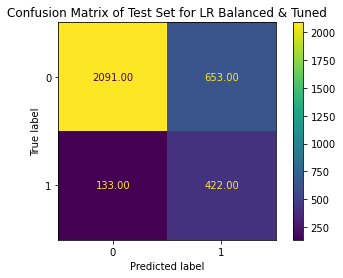

In [168]:
lr_model_score = (lr_tuned_bal.score(X_test_norm, y_test)*100)
print('Accuracy Score for Test Set is : ',lr_model_score)
print('\n')
plot_confusion_matrix(lr_tuned_bal,X_test_norm,y_test,values_format= '.2f')
plt.title('Confusion Matrix of Test Set for LR Balanced & Tuned',fontsize = 12)
print(metrics.classification_report(y_test,ytest_predict_lr))

AUC for Training 86.22316301977988
AUC for Test 82.42146665616053


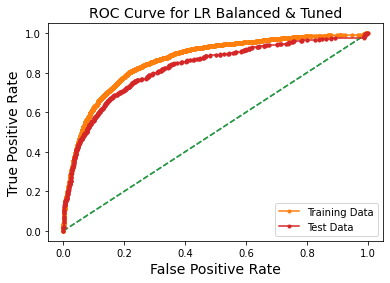

In [169]:
### Training
probs =  lr_tuned_bal.predict_proba(X_train_norm_res)
probs = probs[:,1]
plt.title('ROC Curve for LR Balanced & Tuned',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.xlabel('False Positive Rate',fontsize = 14)
auc = roc_auc_score(y_train_res,probs)
print('AUC for Training', auc*100)
fpr,tpr,thres = roc_curve(y_train_res, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Training Data')

### Test
probs =  lr_tuned_bal.predict_proba(X_test_norm)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC for Test', auc*100)
fpr,tpr,thres = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'Test Data')
plt.legend(loc = 'best')
plt.show()

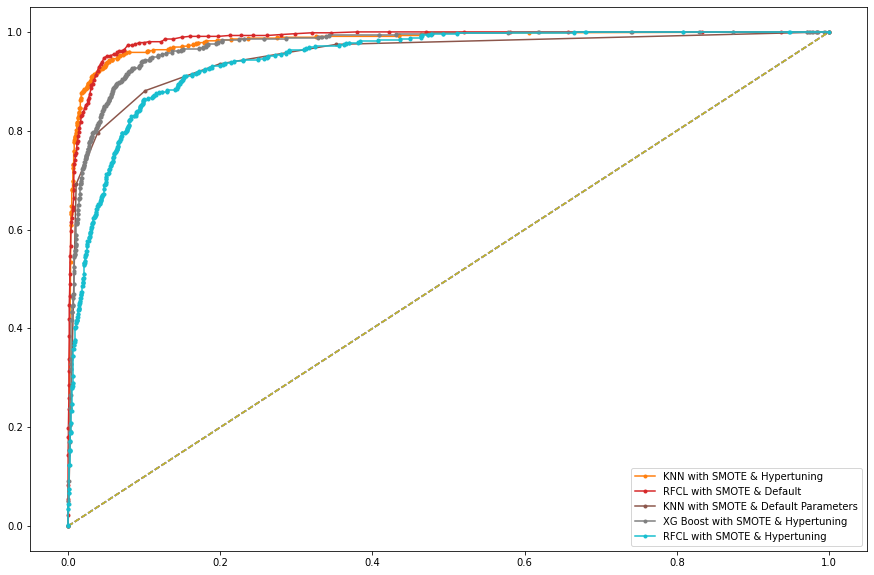

In [188]:
#AUC Score & ROC Curve

fig = plt.figure(figsize=(15,10))

#1 KNN With SMOTE & Hypertuning

probs_knn =  knn_tuned_bal.predict_proba(X_test_norm)
probs_knn = probs_knn[:,1]

fpr,tpr,thres = roc_curve(y_test, probs_knn)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'KNN with SMOTE & Hypertuning')
plt.legend(loc = 'best')


#2 Random Forest Classifier with SMOTE & Default Parameters
probs_rfcl =  rfcl_balanced.predict_proba(X_test)
probs_rfcl = probs_rfcl[:,1]

fpr,tpr,thres = roc_curve(y_test, probs_rfcl)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'RFCL with SMOTE & Default')
plt.legend(loc = 'best')

#3 KNN With SMOTE & Default Parameters

probs_knn_SMOTE =  KNN_model_balanced.predict_proba(X_test_norm)
probs_knn_SMOTE = probs_knn_SMOTE[:,1]

fpr,tpr,thres = roc_curve(y_test, probs_knn_SMOTE)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'KNN with SMOTE & Default Parameters')
plt.legend(loc = 'best')


#4 XG Boost with SMOTE & Hypertuning

probs_xgb =  xgb_tuned_bal.predict_proba(X_test.values)
probs_xgb = probs_xgb[:,1]

fpr,tpr,thres = roc_curve(y_test, probs_xgb)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'XG Boost with SMOTE & Hypertuning')
plt.legend(loc = 'best')

#5 Random Forest With SMOTE & Hypertuning

probs_rfcl_smote =  rfcl_tuned_bal.predict_proba(X_test)
probs_rfcl_smote = probs_rfcl_smote[:,1]


fpr,tpr,thres = roc_curve(y_test, probs_rfcl_smote)
plt.plot([0,1],[0,1],linestyle = '--')
plt.plot(fpr,tpr,marker = '.',label = 'RFCL with SMOTE & Hypertuning')
plt.legend(loc = 'best')

plt.show()